**Introduction**

Pairs trading is a trading strategy that remains neutral to market movements, wherein the focus is on recognizing two closely correlated financial instruments, such as stocks, and engaging in trading based on their relative price movements. In this project, two pairs of shares will be selected according to correlations and pairs trading strategy will be applied to those shares.


## First Part

In the first part of the project, the price differences between two stocks fit into a regression model. Pairs trading will be applied according to the control chart constructed with residual values of this regression model. When we plotted the data, we observed that residuals are distributed with constant variance and we have constructed our study based on this assumption.

In [294]:
!pip install statsmodels

In [295]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

ChatGPT prompt: how to aggregate 4 different csv files into 1 ?

In [296]:
data1 = pd.read_csv("20221226_20230326_bist30.csv")
data2 = pd.read_csv("20230327_20230625_bist30.csv")
data3 = pd.read_csv("20230626_20230924_bist30.csv")
data4 = pd.read_csv("20230925_20231224_bist30.csv")

In [297]:
# List of file paths
csv_files = [data1,data2,data3,data4]

# Read each CSV file into a DataFrame and store them in a list
dfs = [file for file in csv_files]

# Concatenate all DataFrames into one
data1 = pd.concat(dfs, ignore_index=True)

In [298]:
data1.head()

timestamp  price short_name
0  2022-12-26 09:00:00+03:00  143.3      THYAO
1  2022-12-26 10:00:00+03:00  145.3      THYAO
2  2022-12-26 11:00:00+03:00  144.1      THYAO
3  2022-12-26 12:00:00+03:00  144.2      THYAO
4  2022-12-26 13:00:00+03:00  144.3      THYAO

In [299]:
data1.dtypes

timestamp      object
price         float64
short_name     object
dtype: object

In [300]:
data1["timestamp"] = pd.to_datetime(data1["timestamp"])


In [301]:
companies = data1["short_name"].unique()
companies

array(['THYAO', 'AKBNK', 'ARCLK', 'ASELS', 'BIMAS', 'DOHOL', 'EKGYO',
       'EREGL', 'FROTO', 'GUBRF', 'GARAN', 'KRDMD', 'KCHOL', 'KOZAL',
       'KOZAA', 'PGSUS', 'PETKM', 'SAHOL', 'SASA', 'SISE', 'TAVHL',
       'TKFEN', 'TUPRS', 'TTKOM', 'TCELL', 'HALKB', 'ISCTR', 'VAKBN',
       'VESTL', 'YKBNK'], dtype=object)

In [302]:
def seperate_data(data1):
    df_list = []
    for values in data1["short_name"].unique():
        values = data1[data1["short_name"] == values]

        df_list.append(values)

    return df_list


In [303]:
df_list = seperate_data(data1)

df_list[0]

timestamp   price short_name
0     2022-12-26 09:00:00+03:00  143.30      THYAO
1     2022-12-26 10:00:00+03:00  145.30      THYAO
2     2022-12-26 11:00:00+03:00  144.10      THYAO
3     2022-12-26 12:00:00+03:00  144.20      THYAO
4     2022-12-26 13:00:00+03:00  144.30      THYAO
...                         ...     ...        ...
54947 2023-11-21 09:00:00+03:00  256.00      THYAO
54948 2023-11-21 10:00:00+03:00  255.00      THYAO
54949 2023-11-21 11:00:00+03:00  257.75      THYAO
54950 2023-11-21 12:00:00+03:00  258.25      THYAO
54951 2023-11-21 13:00:00+03:00  258.25      THYAO

[2233 rows x 3 columns]

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


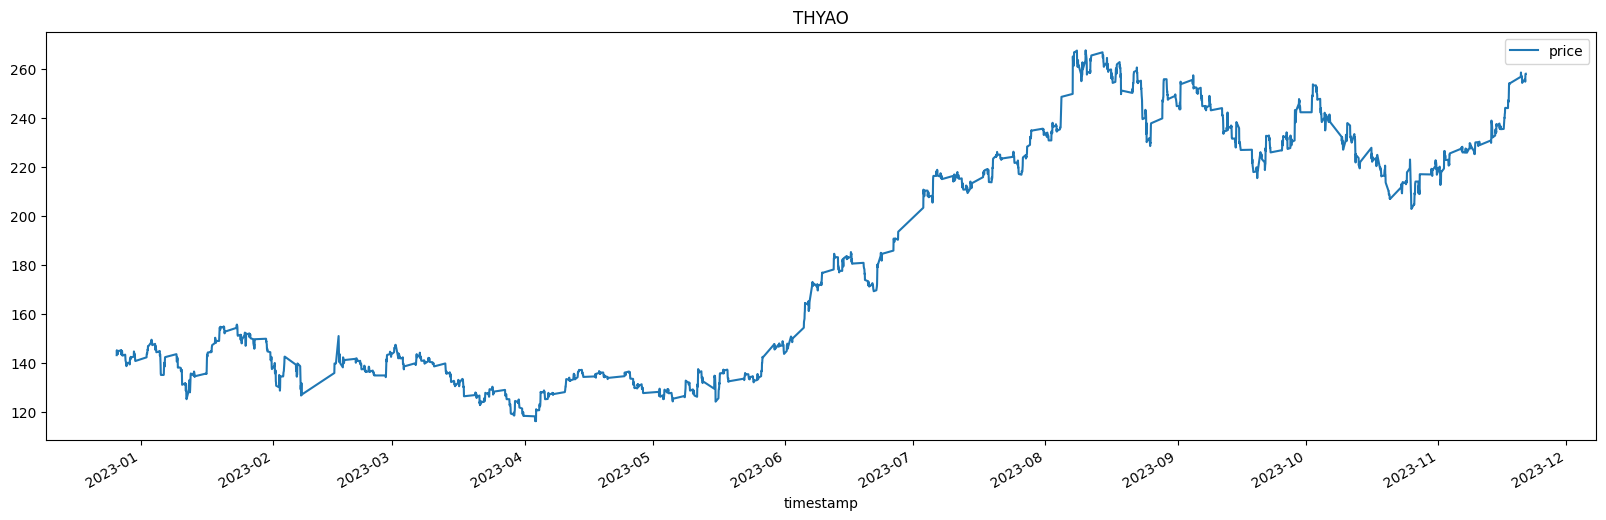

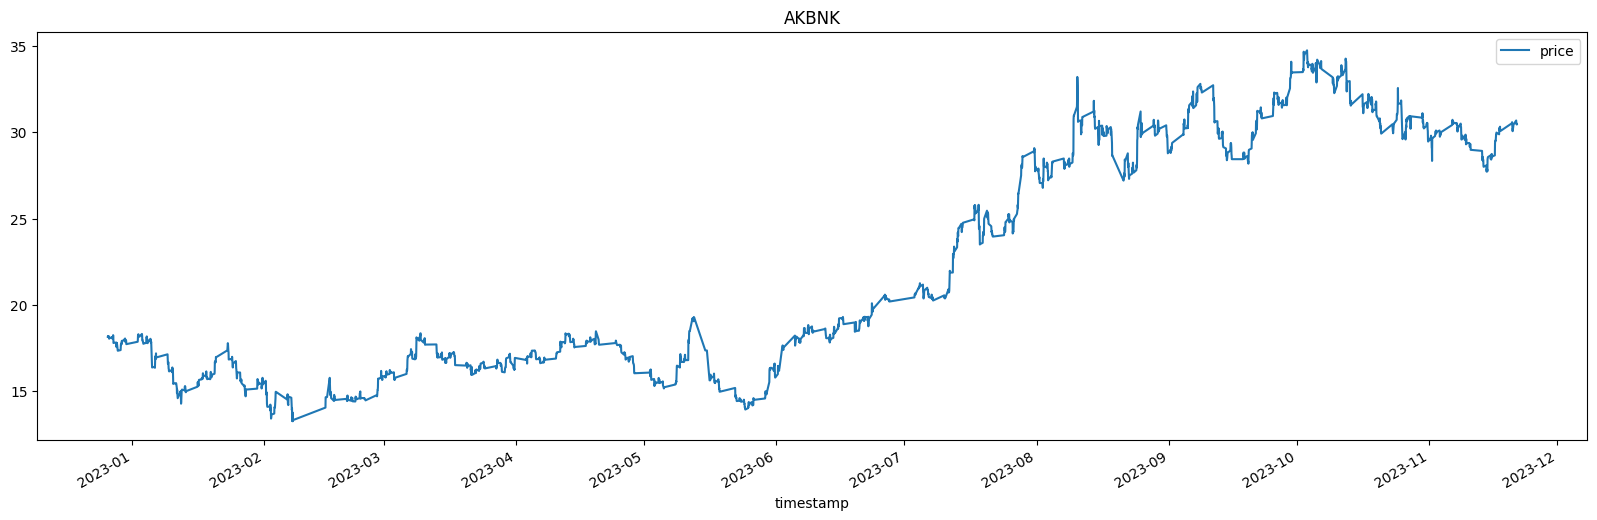

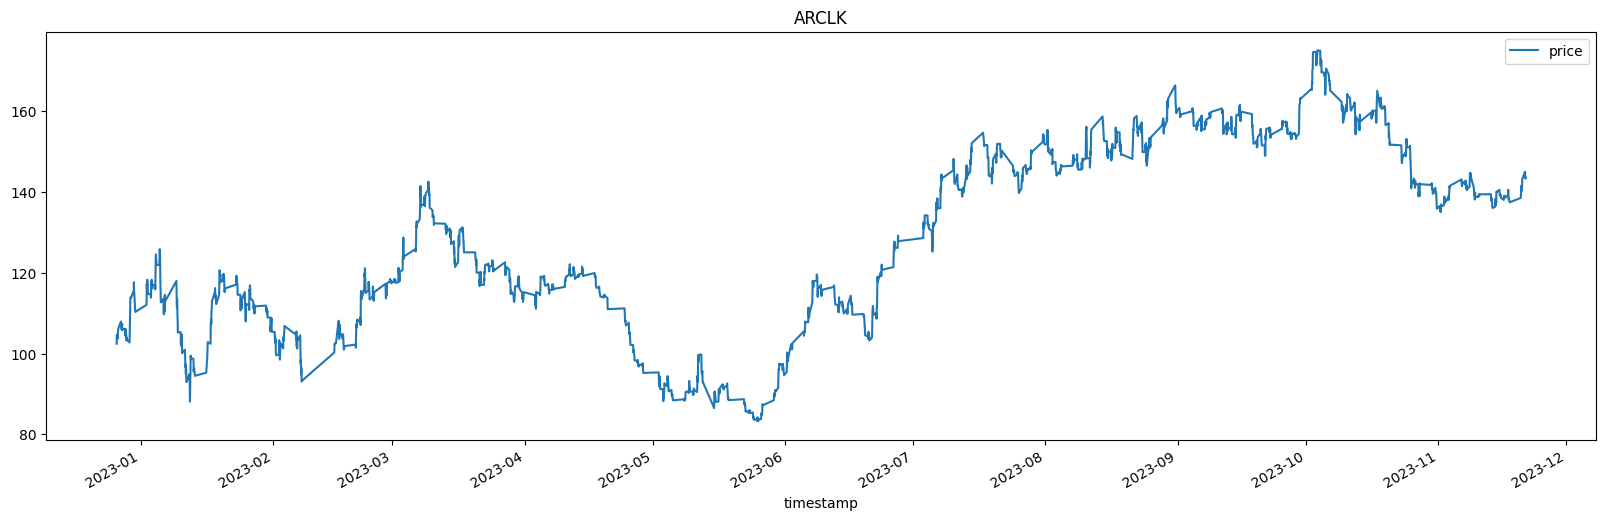

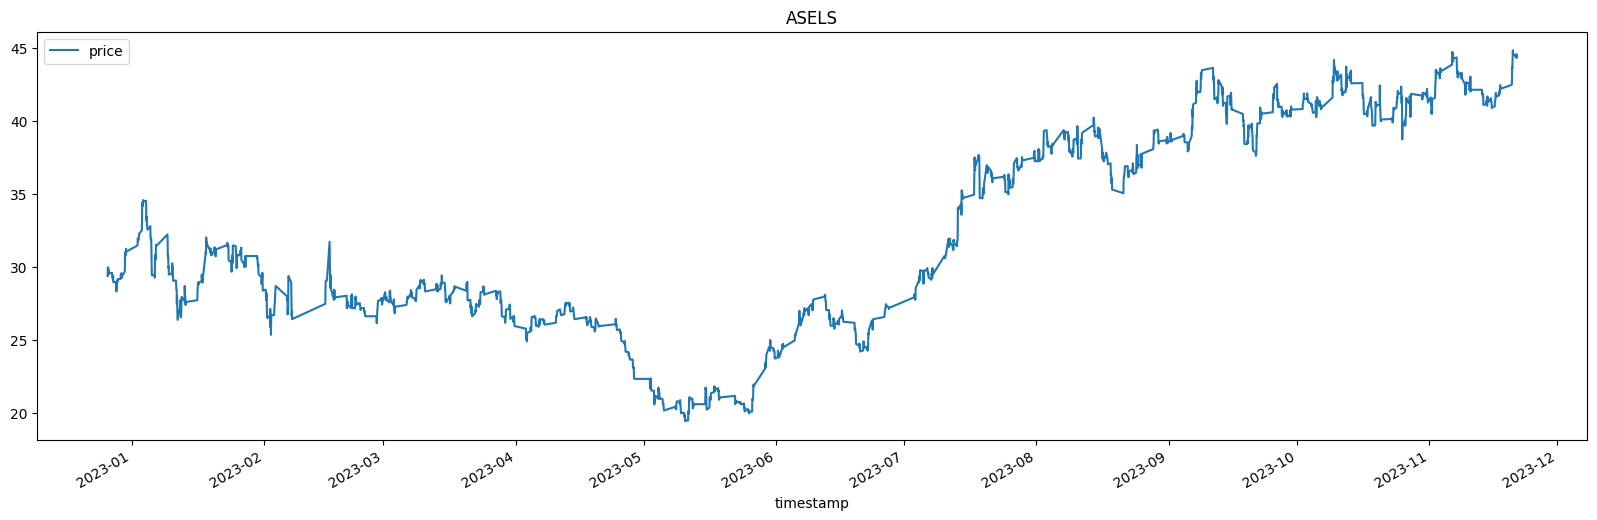

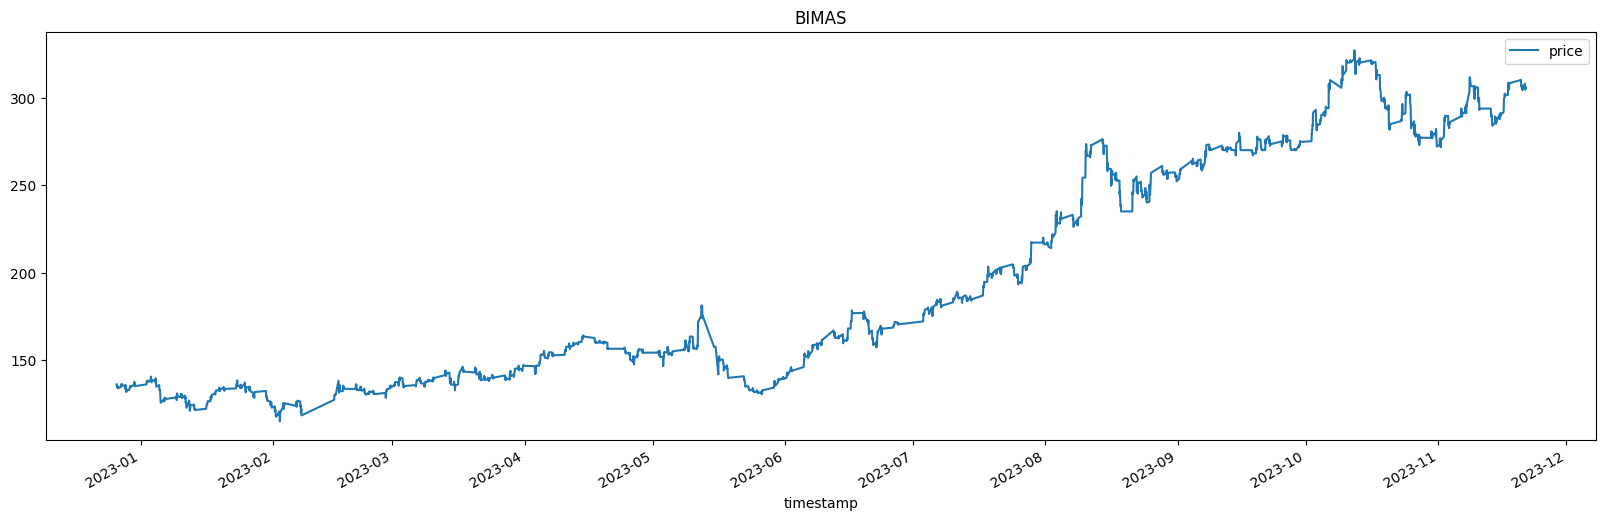

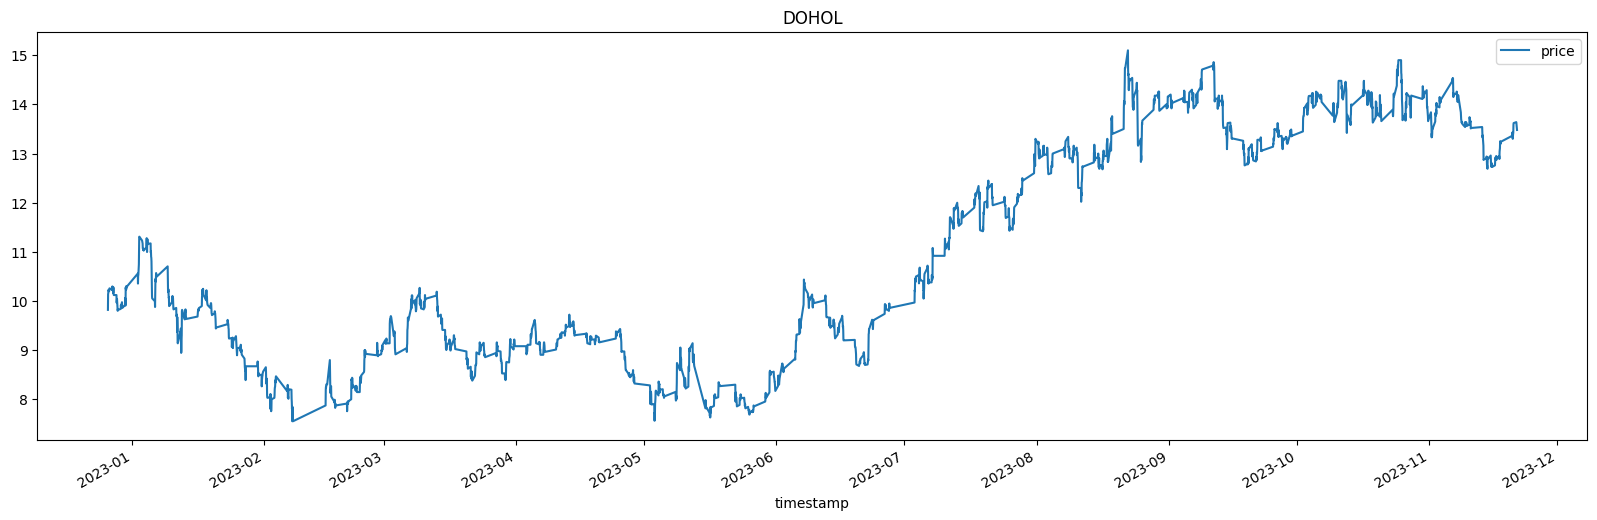

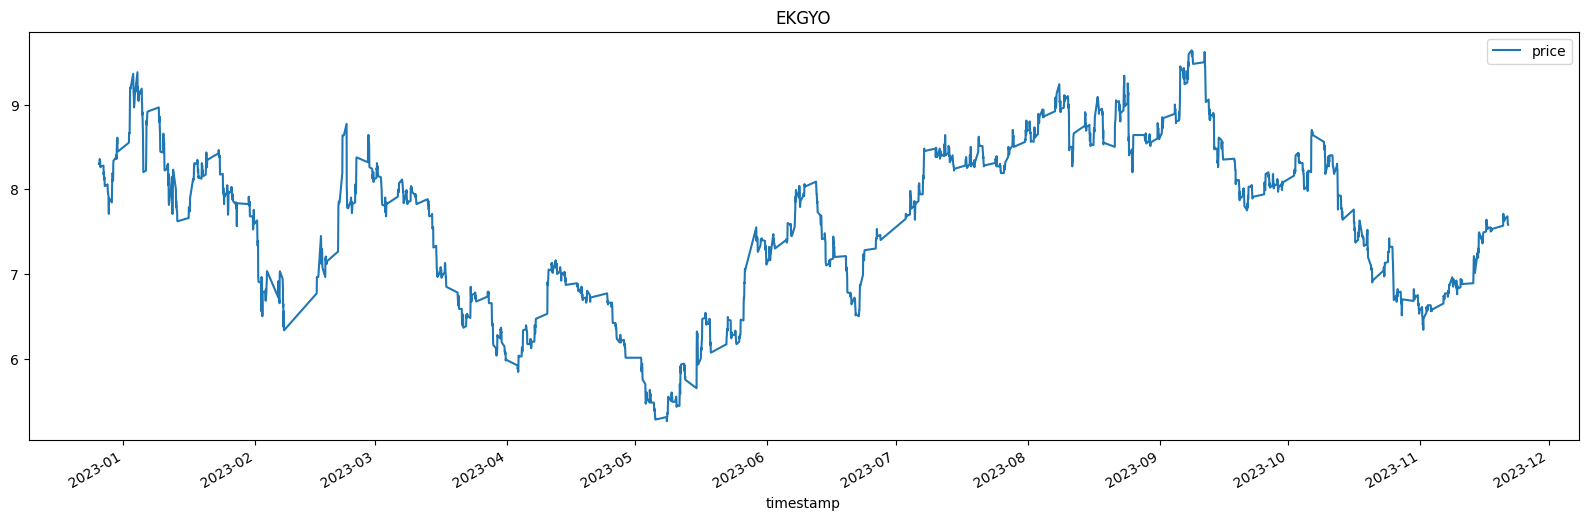

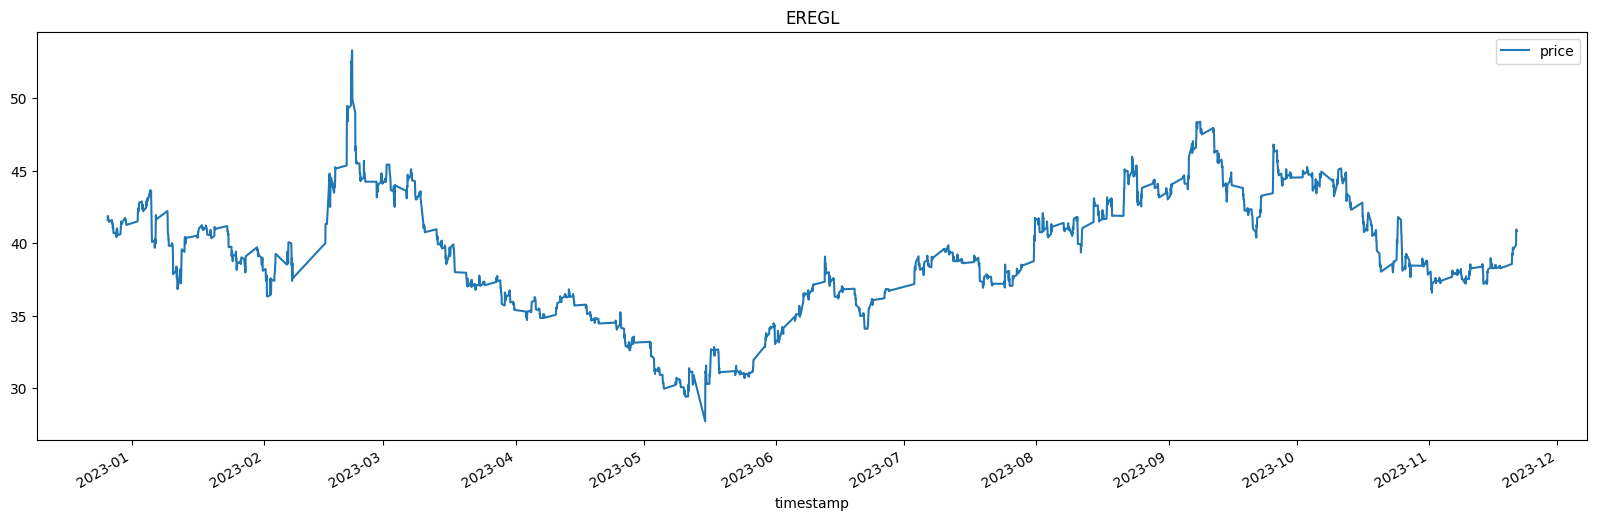

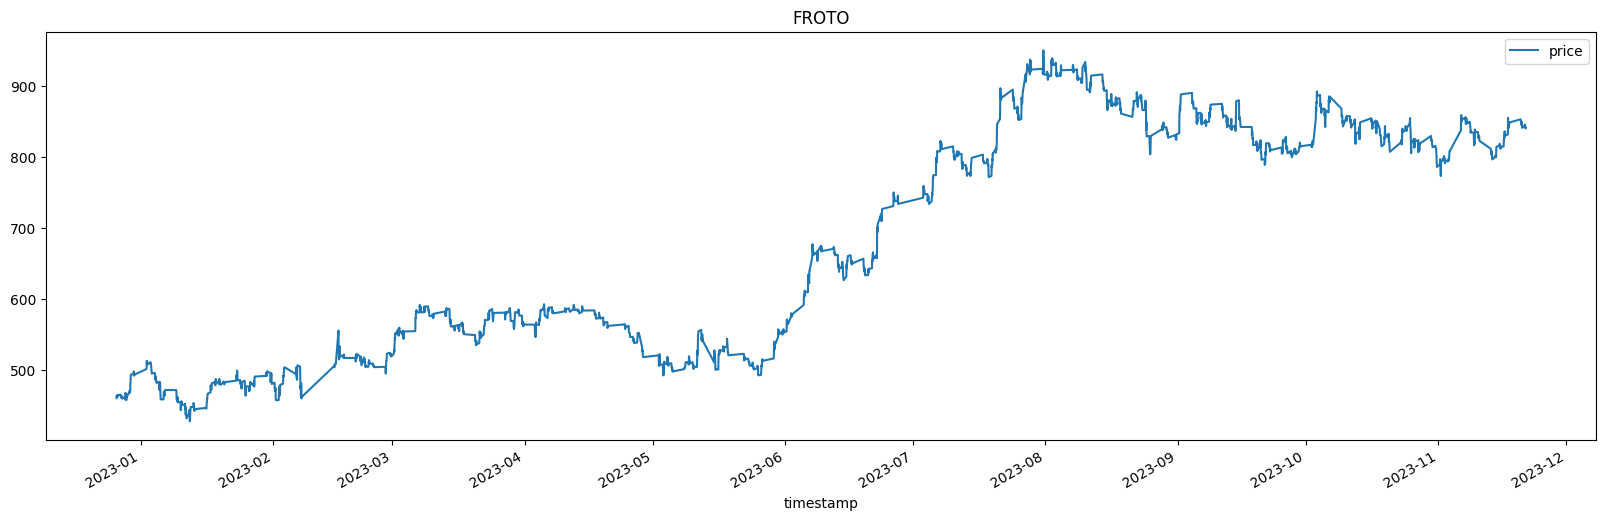

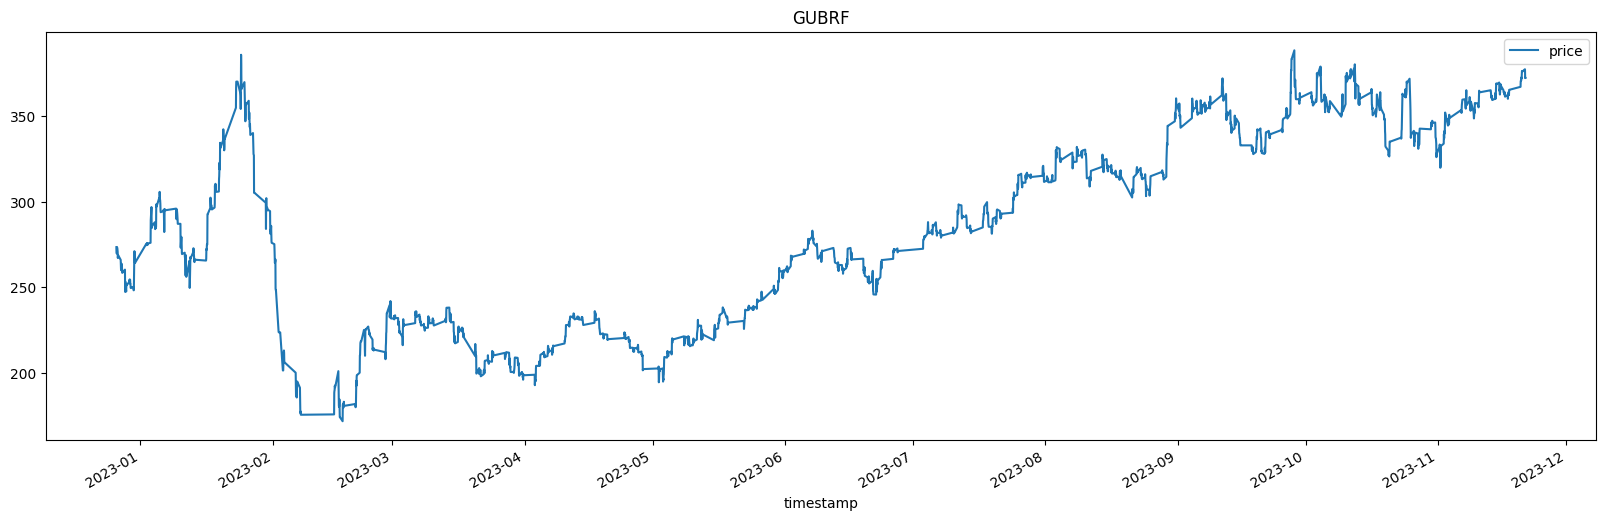

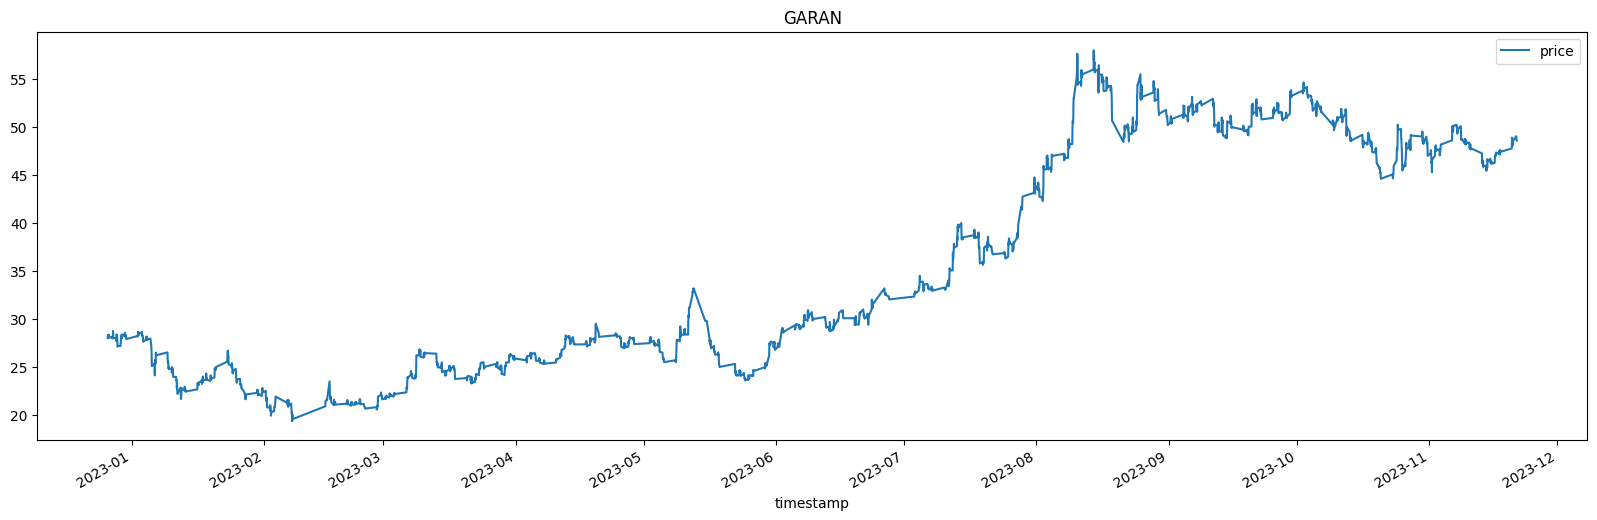

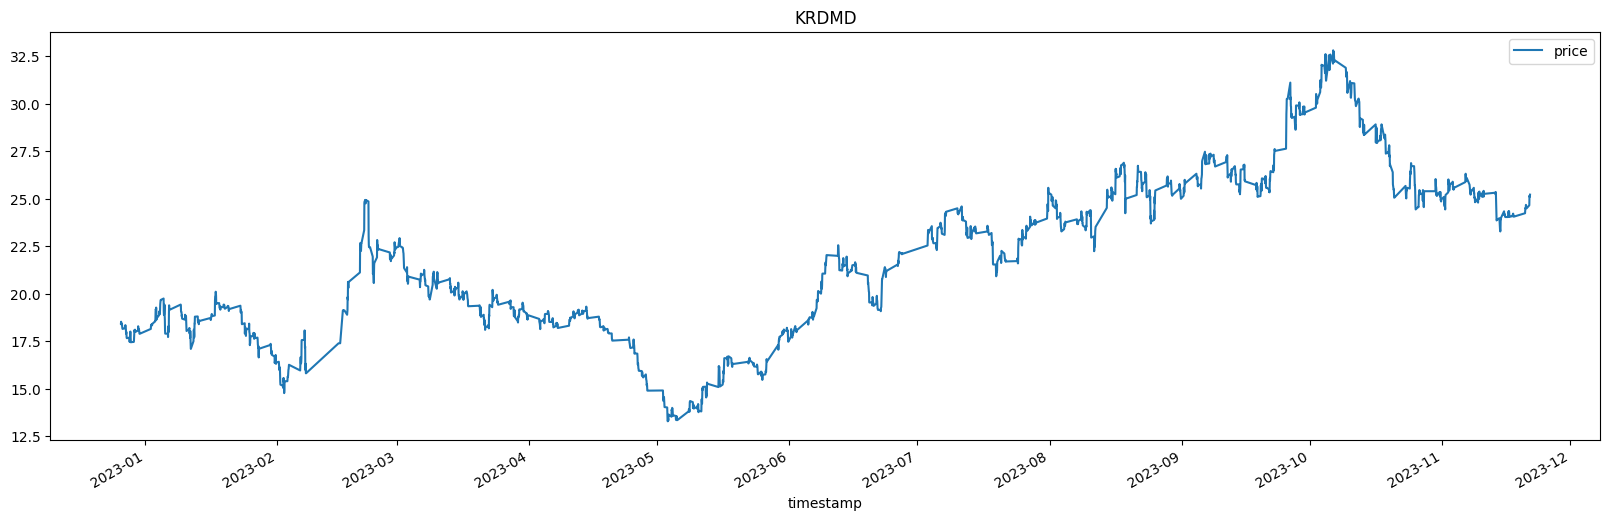

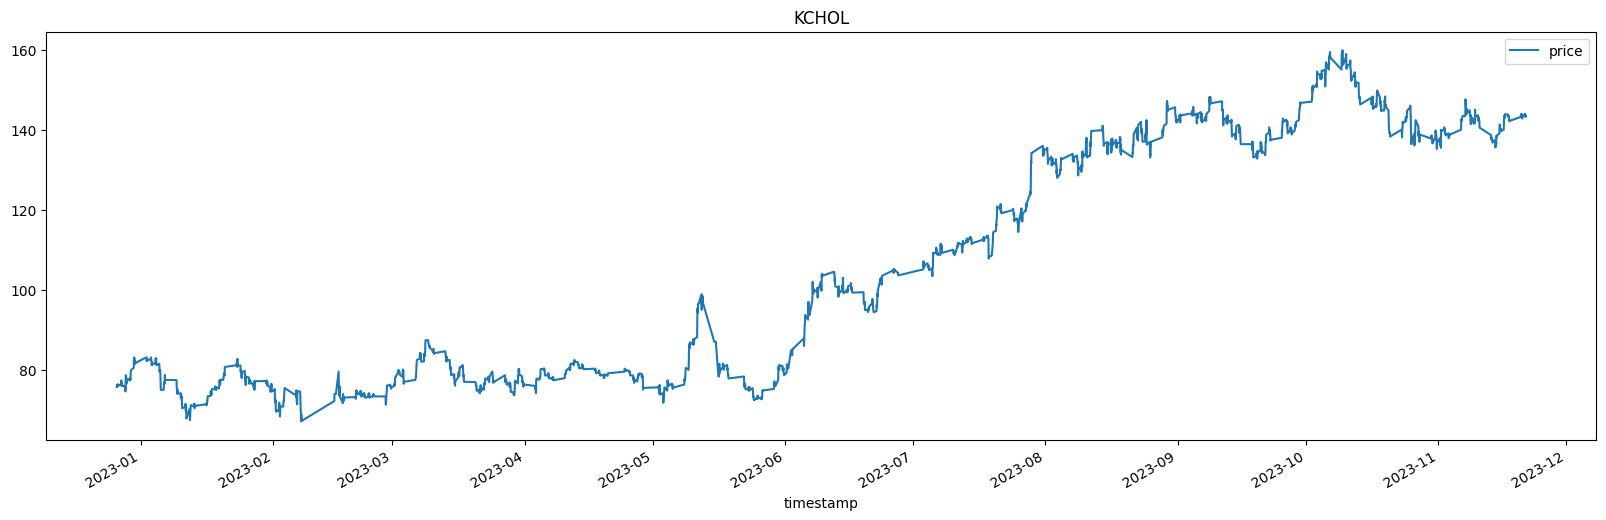

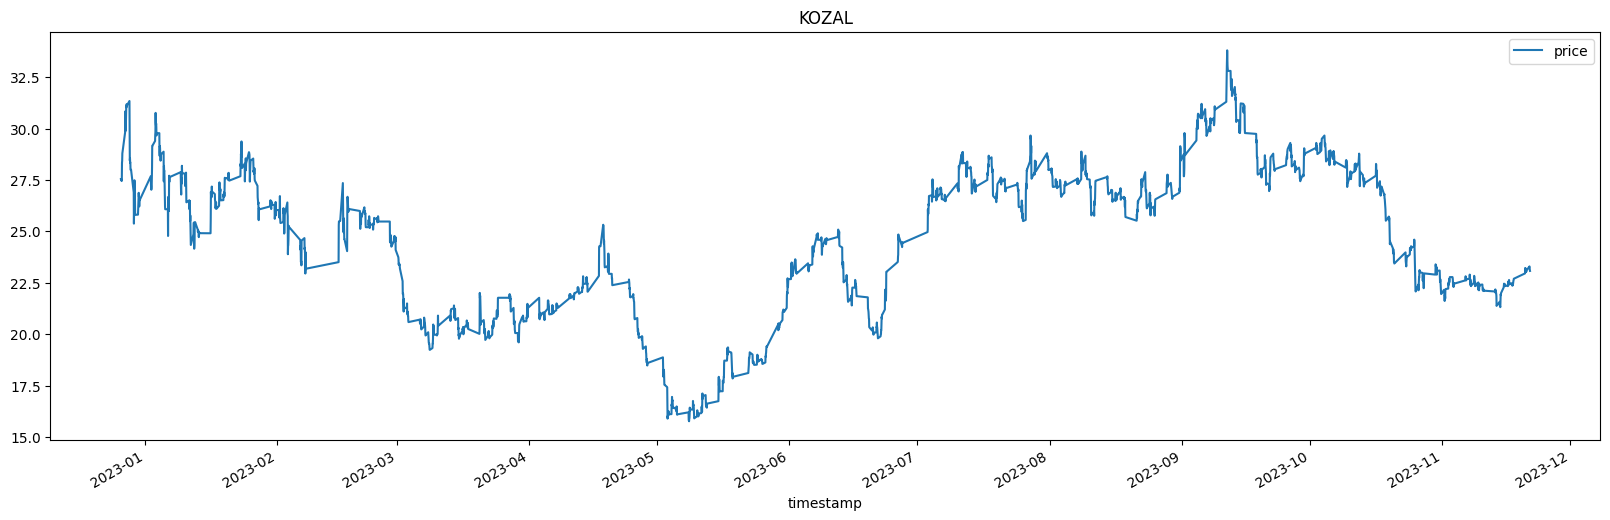

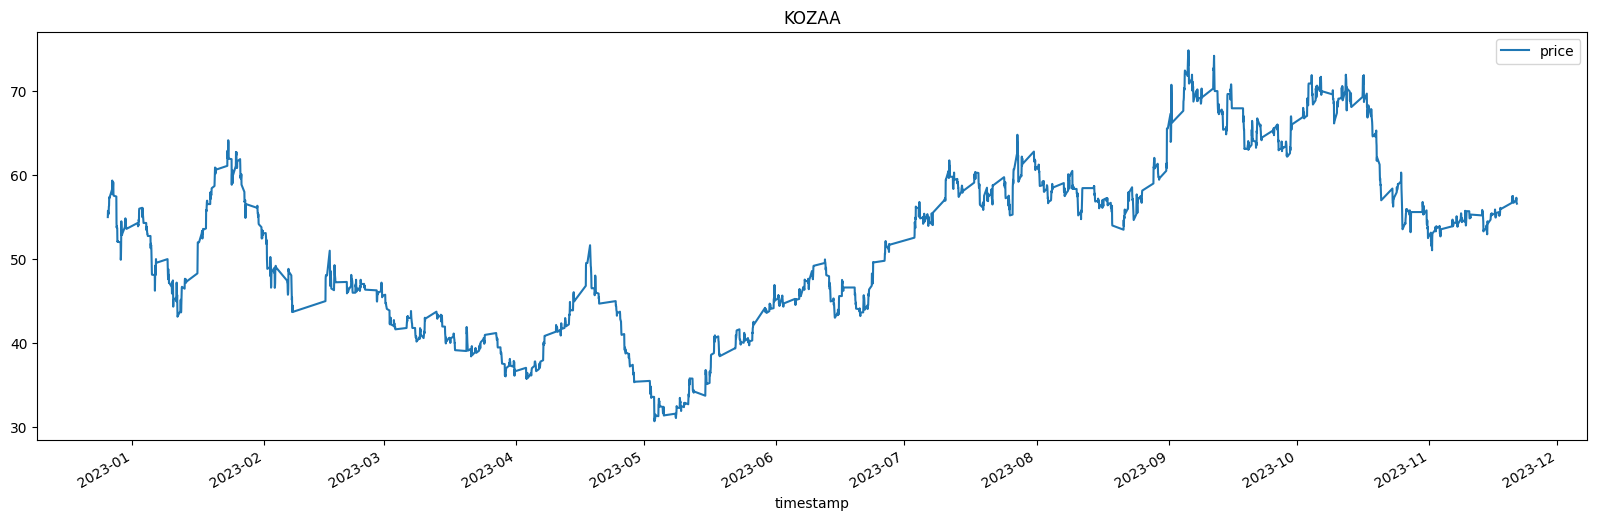

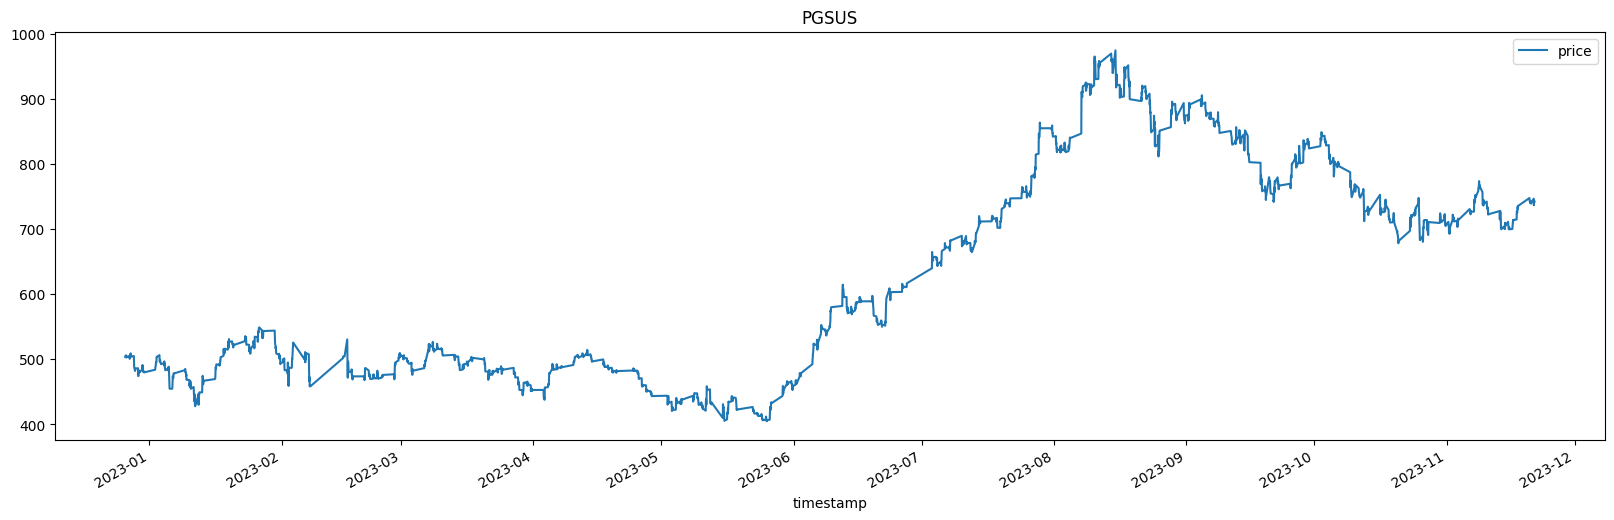

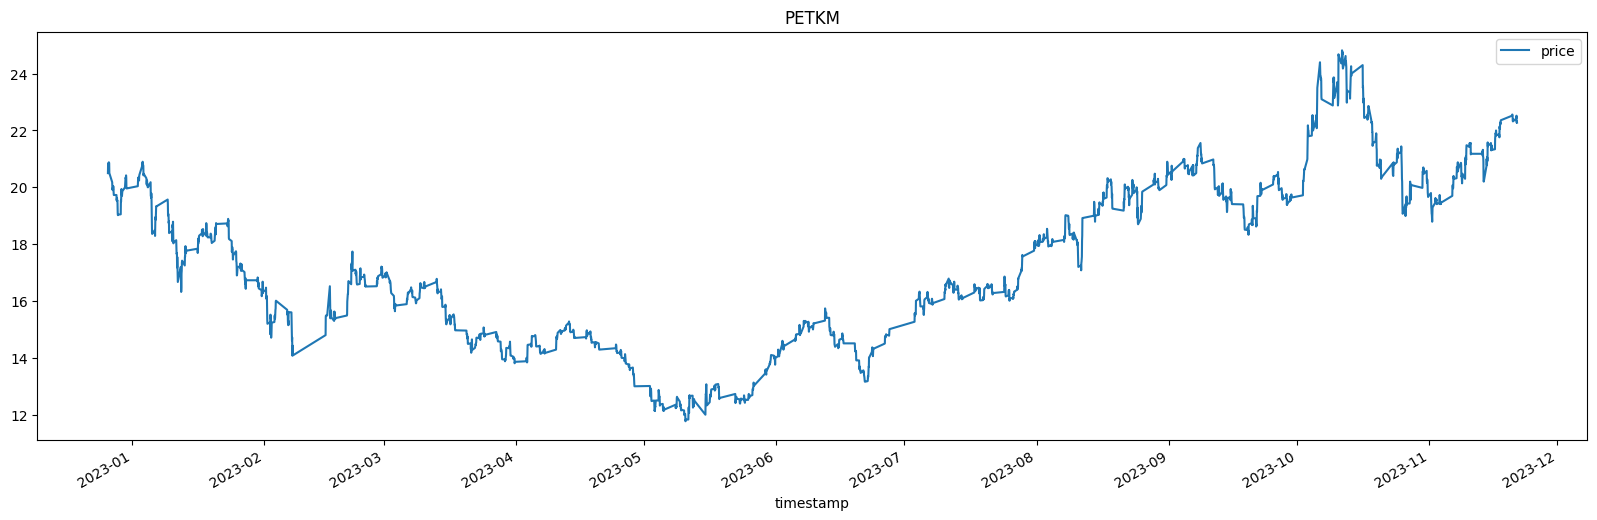

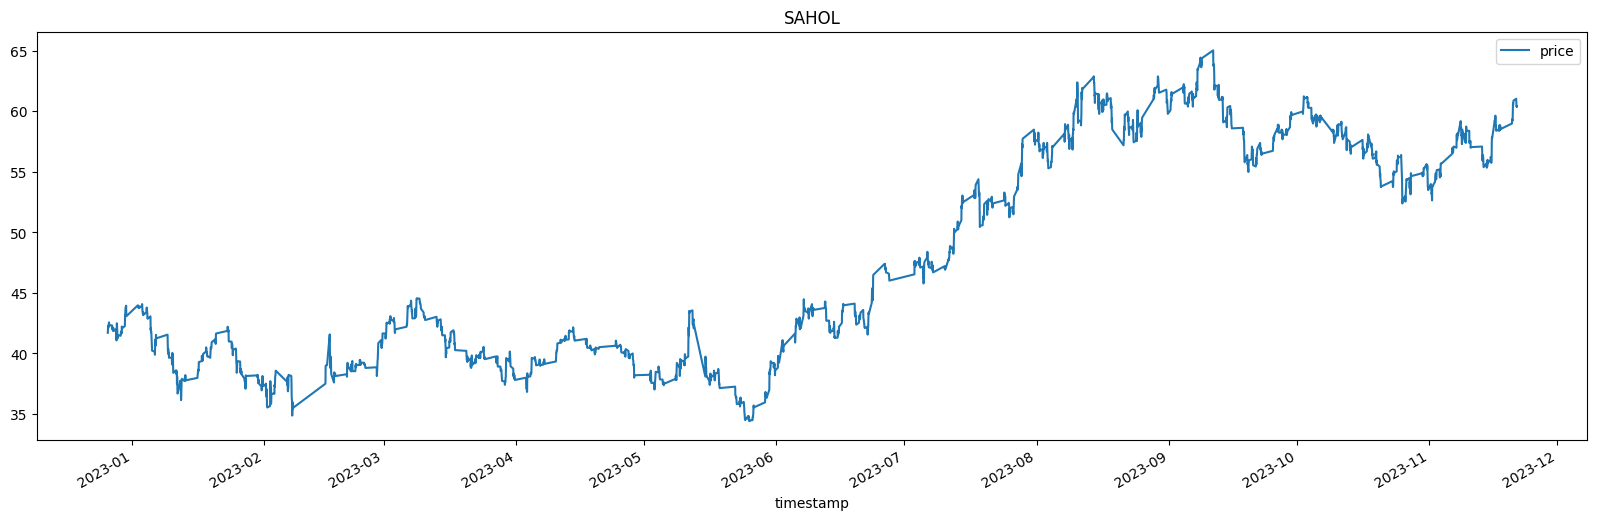

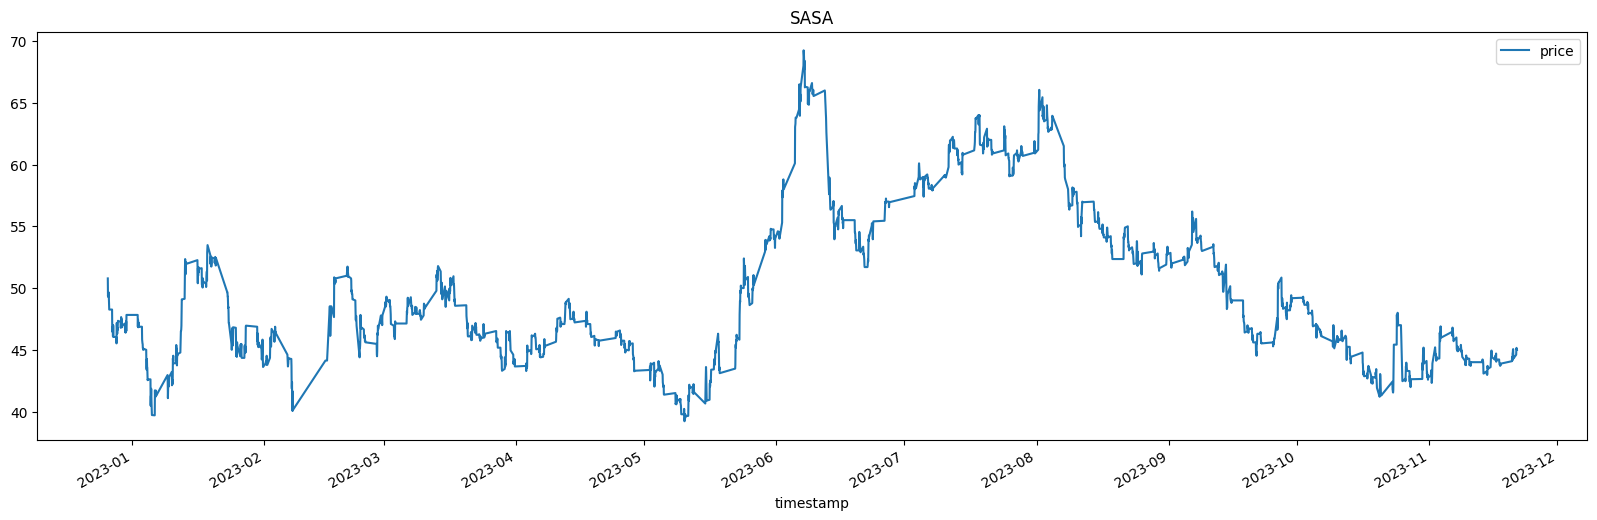

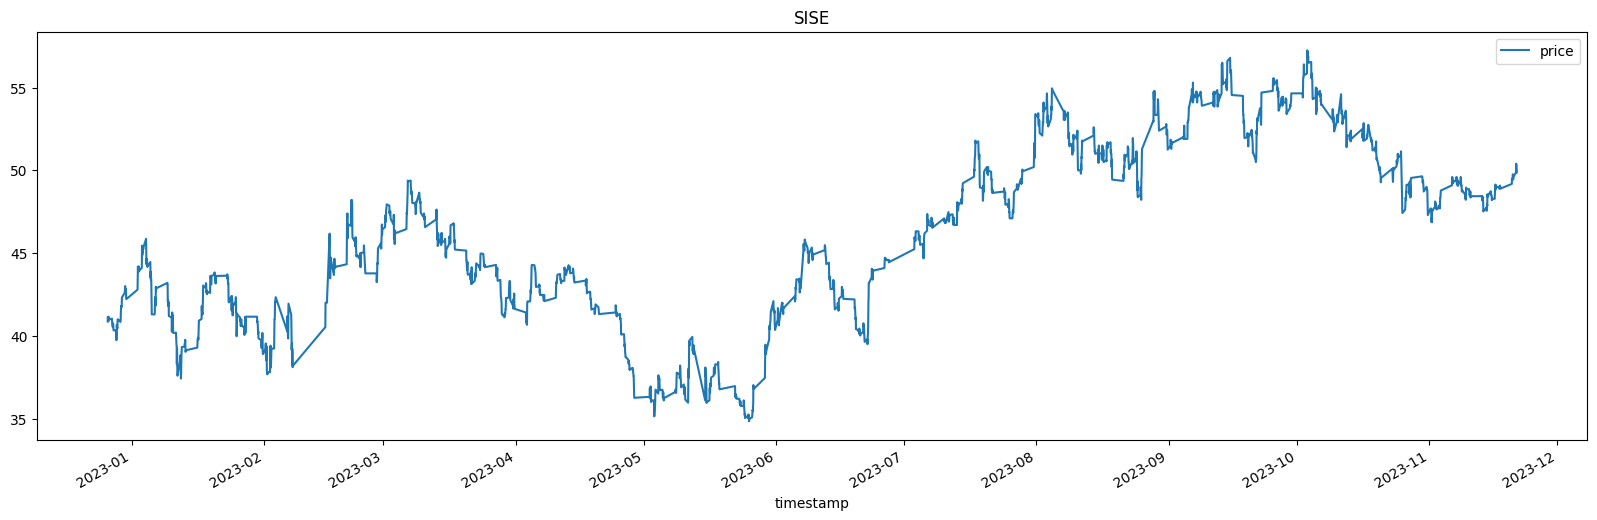

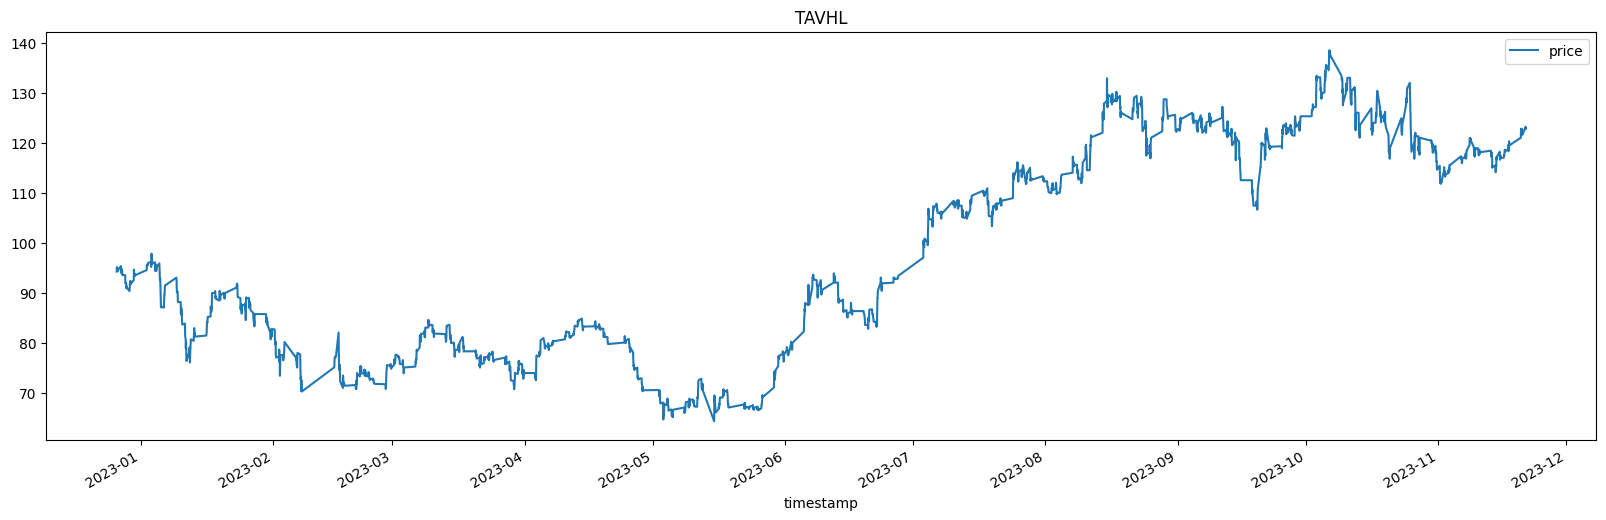

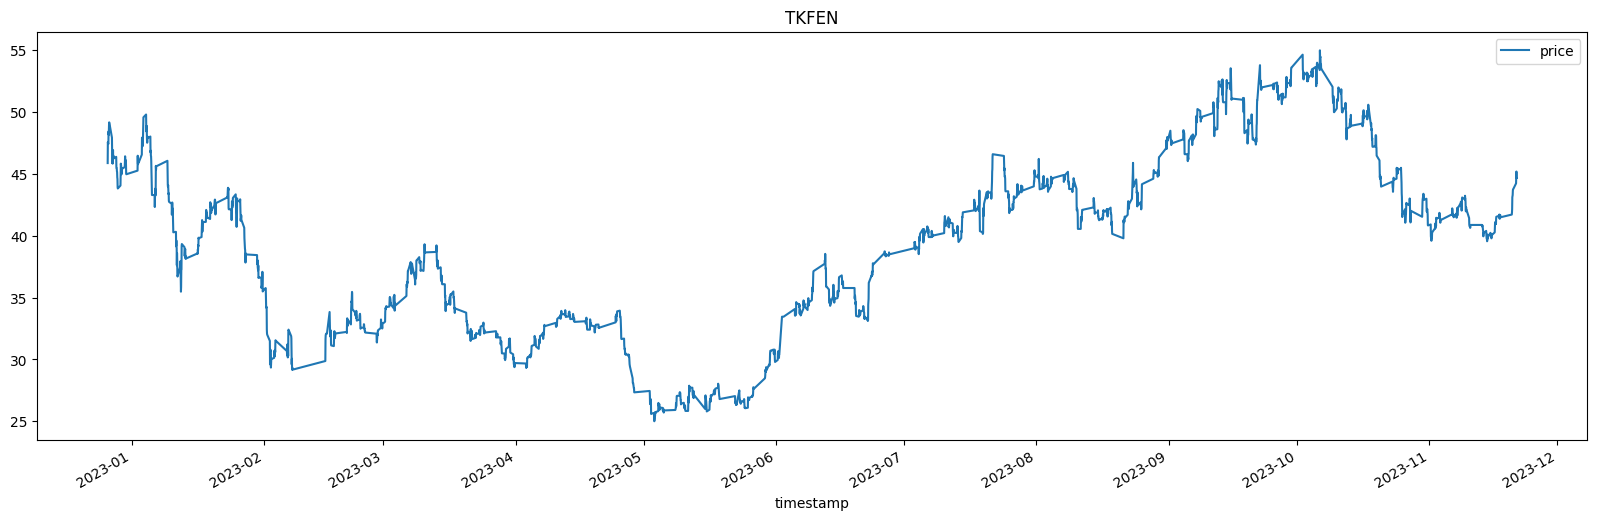

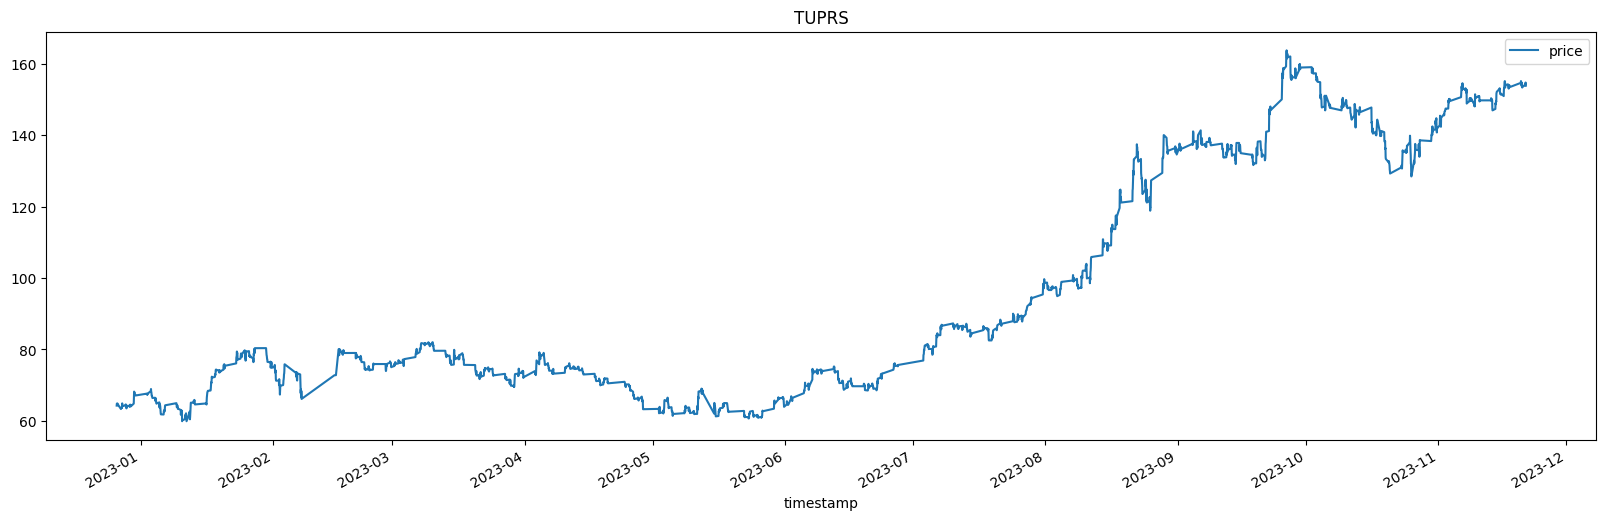

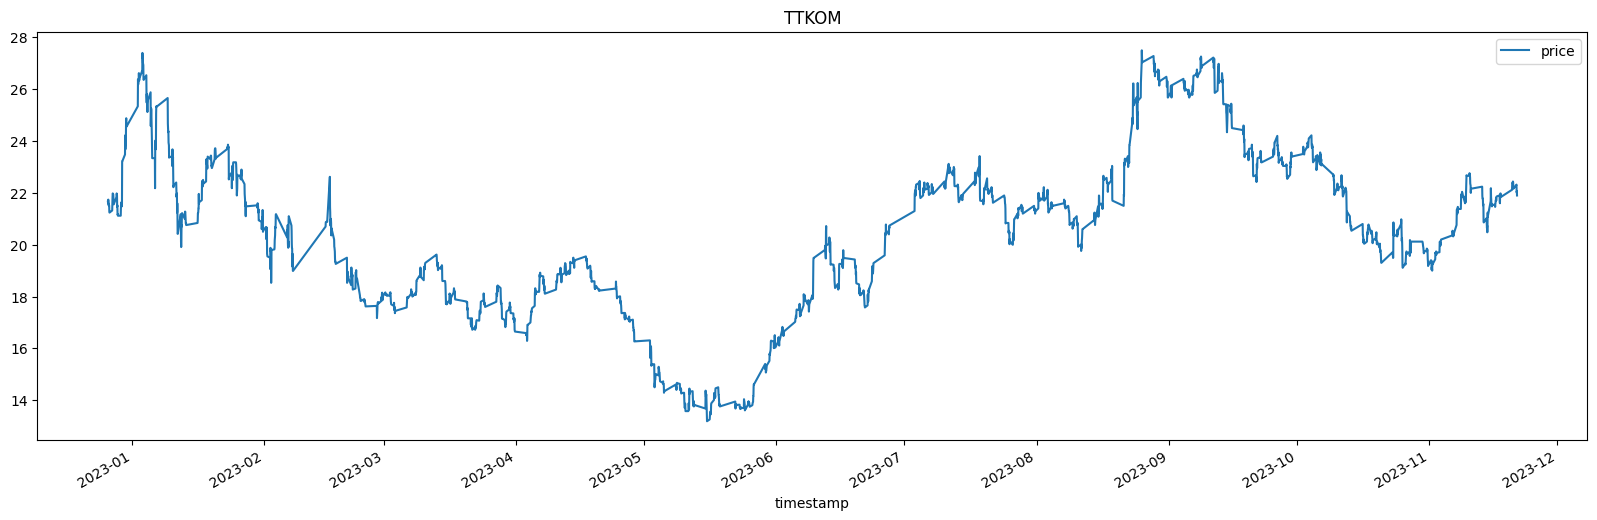

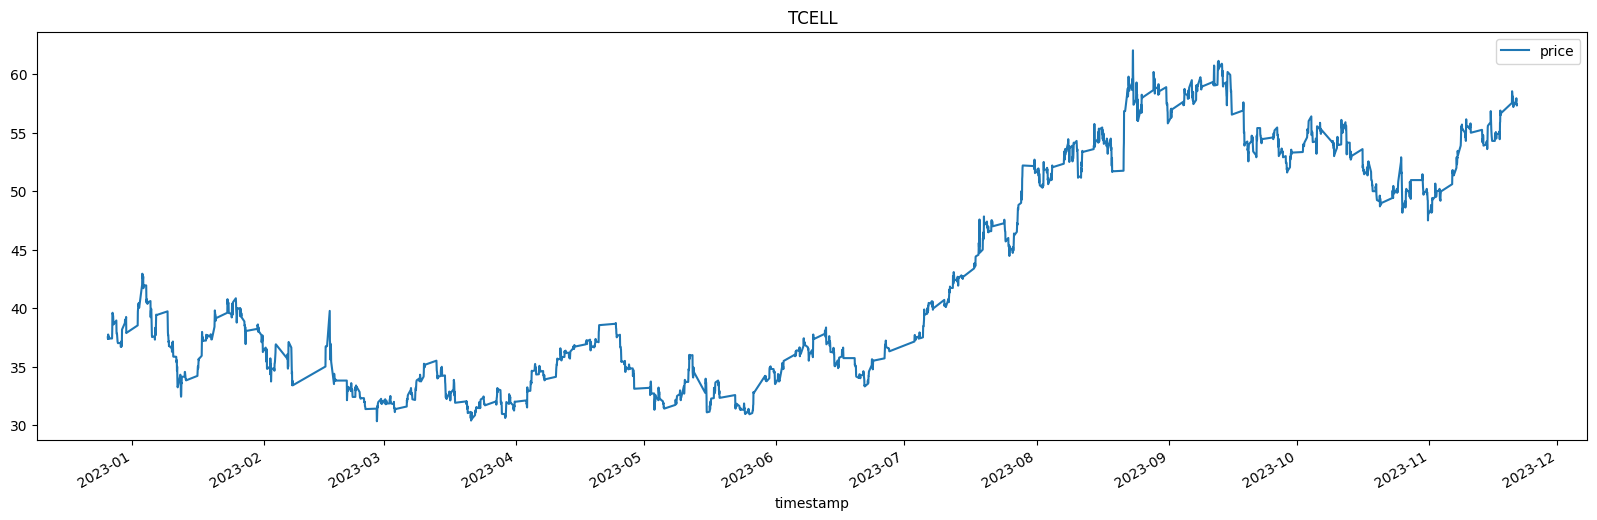

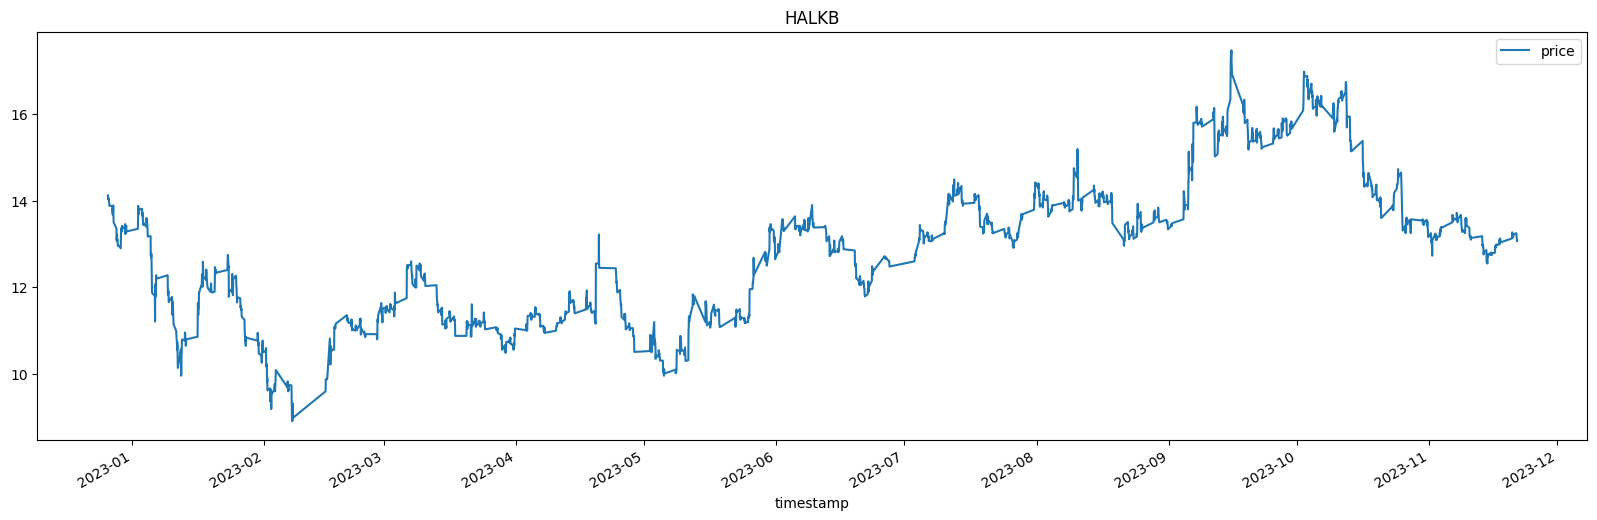

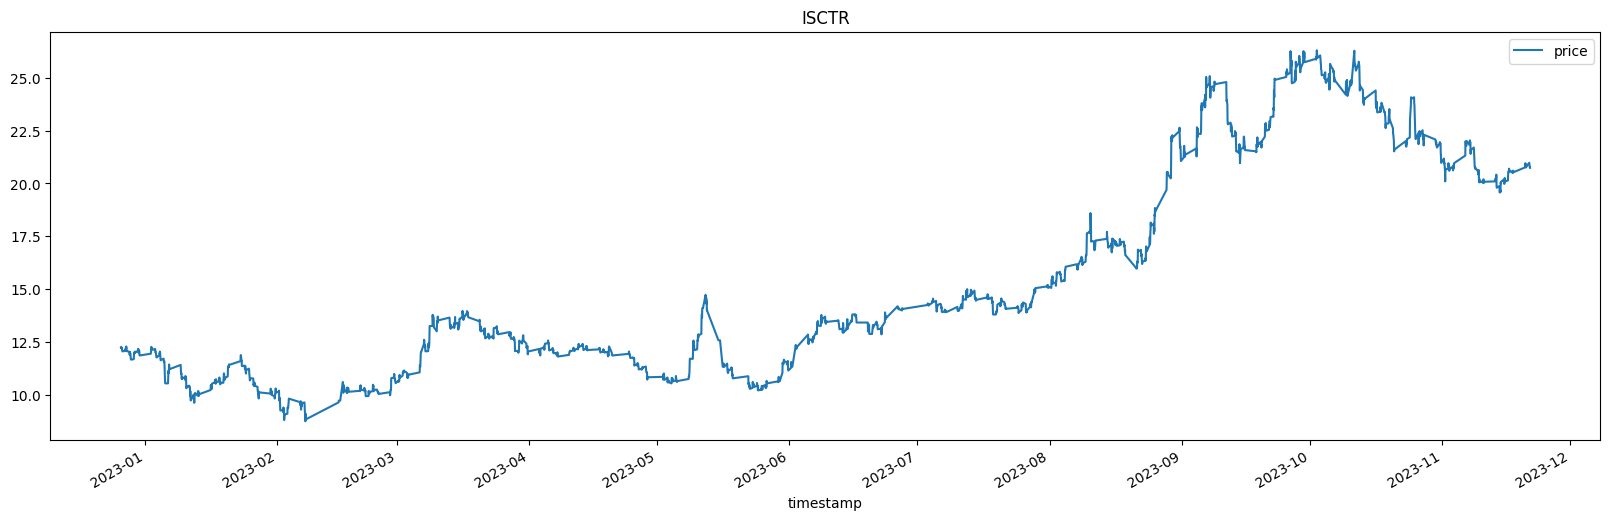

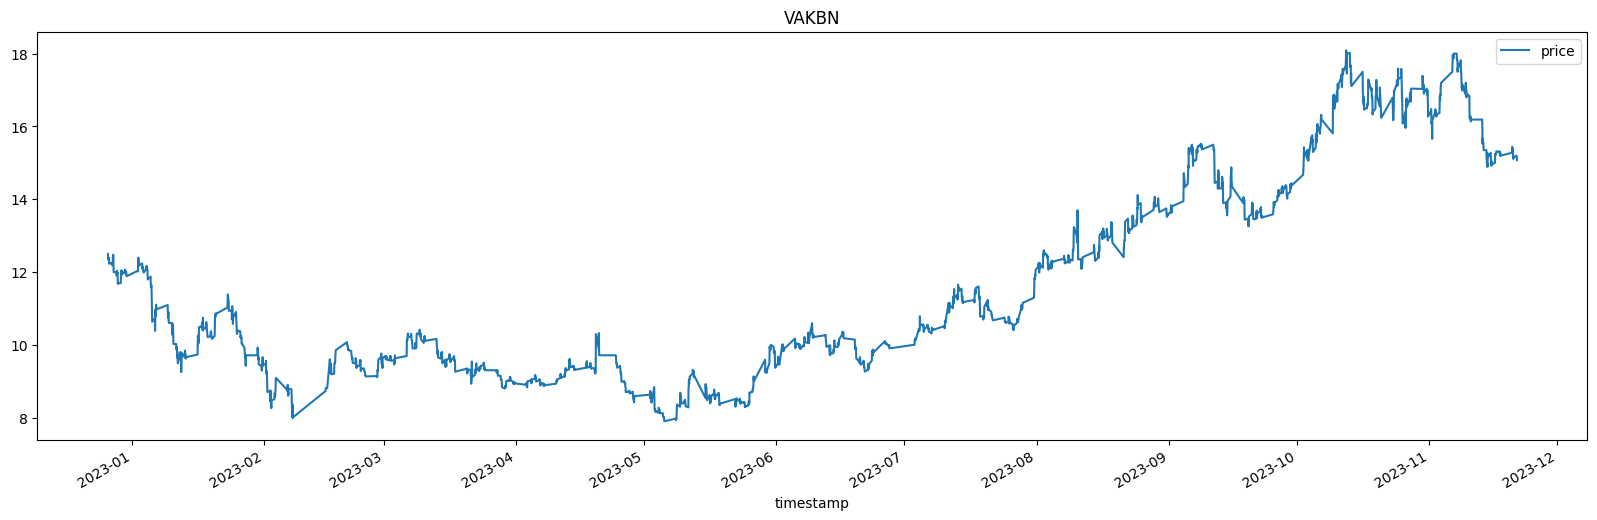

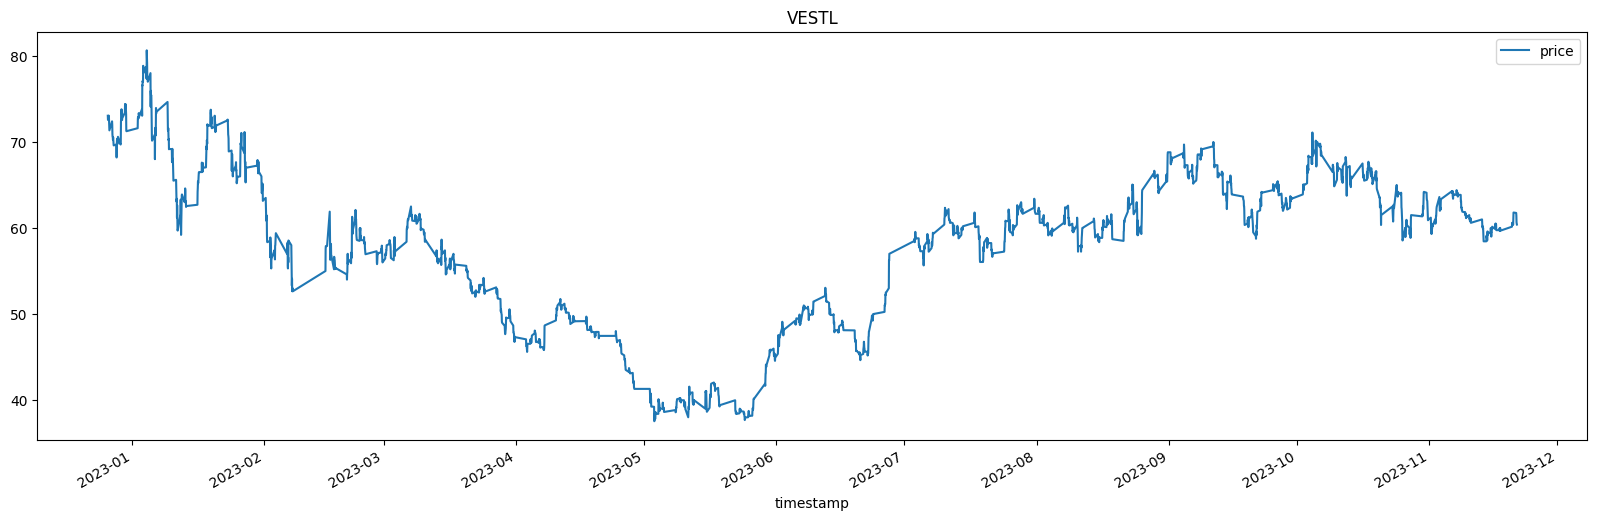

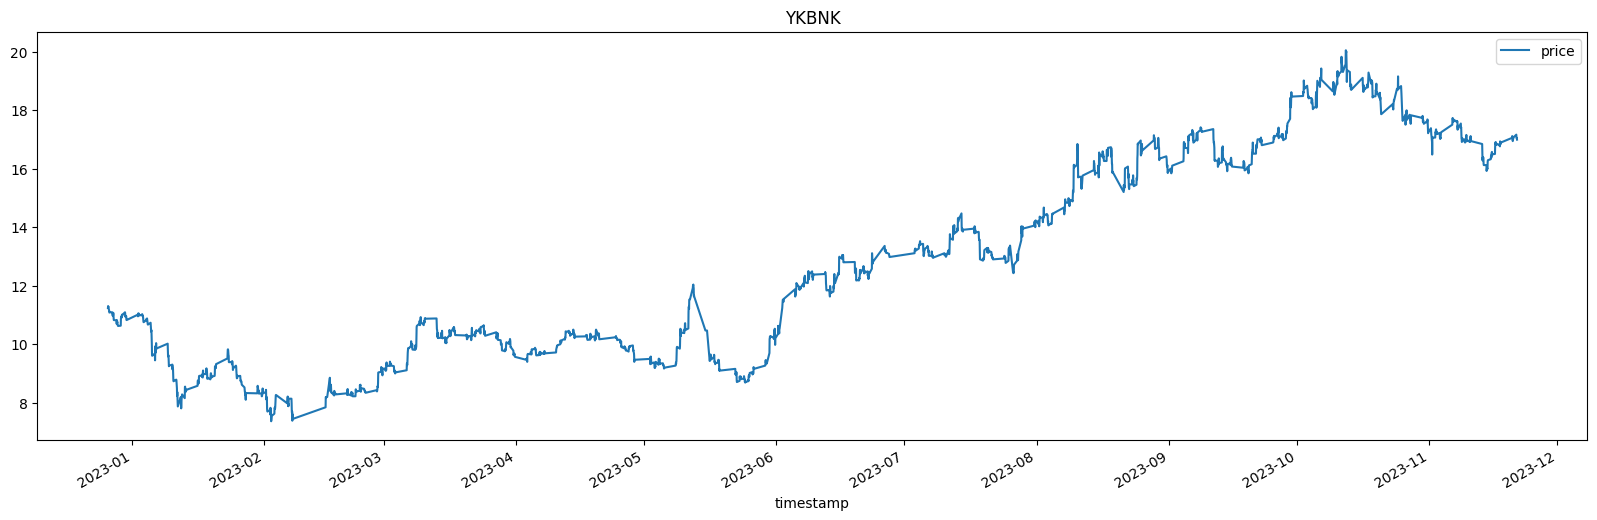

In [304]:
for i in range(len(df_list)):
    df_list[i].plot(title=companies[i],x="timestamp", y="price", figsize=(20,6))

ChatGPT prompt: I have a list consists of dfs which has same columns. Write a python code to contruct the correlation matrix.

In [305]:
import pandas as pd

def calculate_price_correlation(dataframes):
    # Merge all dataframes on 'timestamp', keeping only the 'price' column from each
    merged_df = None
    for i, df in enumerate(dataframes):
        # Renaming the price column to include the dataframe identifier
        df_renamed = df.rename(columns={'price': companies[i]})
        if merged_df is None:
            merged_df = df_renamed
        else:
            # Merging on 'timestamp'
            merged_df = pd.merge(merged_df, df_renamed[['timestamp', companies[i]]], on='timestamp', how='inner')

    # Calculate the correlation matrix for the price columns, explicitly stating numeric_only=True
    correlation_matrix = merged_df.corr(numeric_only=True)
    return correlation_matrix, merged_df

# Example usage:
# dfs = [df1, df2, df3] # Your list of dataframes
# correlation_matrix = calculate_price_correlation(dfs)


In [306]:
correlation_matrix, merged_df = calculate_price_correlation(df_list)
correlation_matrix

THYAO     AKBNK     ARCLK     ASELS     BIMAS     DOHOL     EKGYO  \
THYAO  1.000000  0.927990  0.866390  0.865075  0.876044  0.909923  0.584238   
AKBNK  0.927990  1.000000  0.896962  0.921354  0.969132  0.963283  0.440232   
ARCLK  0.866390  0.896962  1.000000  0.890969  0.824788  0.909530  0.608780   
ASELS  0.865075  0.921354  0.890969  1.000000  0.890778  0.949158  0.548941   
BIMAS  0.876044  0.969132  0.824788  0.890778  1.000000  0.923392  0.290123   
DOHOL  0.909923  0.963283  0.909530  0.949158  0.923392  1.000000  0.541357   
EKGYO  0.584238  0.440232  0.608780  0.548941  0.290123  0.541357  1.000000   
EREGL  0.485534  0.475807  0.658467  0.623616  0.387121  0.554893  0.783809   
FROTO  0.952126  0.919603  0.886032  0.824047  0.876105  0.886641  0.459013   
GUBRF  0.840671  0.852034  0.753549  0.876648  0.825977  0.871338  0.551574   
GARAN  0.936405  0.982634  0.855309  0.875128  0.952575  0.940310  0.434799   
KRDMD  0.850504  0.891221  0.917298  0.876176  0.852987  0.884422  0.566729   
KCHOL  0.948396  0.985123  0.882573  0.897888  0.969369  0.952369  0.431138   
KOZAL  0.597493  0.517969  0.636085  0.643503  0.392027  0.593266  0.855182   
KOZAA  0.808950  0.793641  0.813552  0.849649  0.719037  0.820617  0.728171   
PGSUS  0.973862  0.916666  0.897048  0.859732  0.840604  0.903514  0.622864   
PETKM  0.706113  0.785155  0.762838  0.896137  0.766124  0.852132  0.610603   
SAHOL  0.961033  0.973862  0.919293  0.915937  0.924503  0.960788  0.560149   
SASA   0.375087  0.120469  0.247342  0.073010 -0.011738  0.139850  0.502159   
SISE   0.848253  0.872174  0.962571  0.884939  0.799592  0.882810  0.655171   
TAVHL  0.944557  0.955705  0.915285  0.936430  0.904318  0.968754  0.595083   
TKFEN  0.756897  0.792686  0.836240  0.865535  0.703699  0.846989  0.734612   
TUPRS  0.821960  0.926268  0.829604  0.910466  0.949890  0.903814  0.323870   
TTKOM  0.642405  0.589922  0.694350  0.728698  0.485523  0.693496  0.792803   
TCELL  0.928303  0.946678  0.860706  0.926500  0.911954  0.949857  0.561368   
HALKB  0.808102  0.847779  0.808142  0.774860  0.777245  0.827678  0.604534   
ISCTR  0.805504  0.943880  0.836013  0.863003  0.946244  0.897552  0.313360   
VAKBN  0.780396  0.901830  0.779591  0.921890  0.918410  0.920870  0.375774   
VESTL  0.479559  0.484287  0.615708  0.710938  0.392410  0.616914  0.752757   
YKBNK  0.896445  0.976499  0.858877  0.876496  0.969189  0.938717  0.362189   

          EREGL     FROTO     GUBRF  ...     TAVHL     TKFEN     TUPRS  \
THYAO  0.485534  0.952126  0.840671  ...  0.944557  0.756897  0.821960   
AKBNK  0.475807  0.919603  0.852034  ...  0.955705  0.792686  0.926268   
ARCLK  0.658467  0.886032  0.753549  ...  0.915285  0.836240  0.829604   
ASELS  0.623616  0.824047  0.876648  ...  0.936430  0.865535  0.910466   
BIMAS  0.387121  0.876105  0.825977  ...  0.904318  0.703699  0.949890   
DOHOL  0.554893  0.886641  0.871338  ...  0.968754  0.846989  0.903814   
EKGYO  0.783809  0.459013  0.551574  ...  0.595083  0.734612  0.323870   
EREGL  1.000000  0.386585  0.465682  ...  0.563725  0.721908  0.520701   
FROTO  0.386585  1.000000  0.738193  ...  0.900130  0.671257  0.793044   
GUBRF  0.465682  0.738193  1.000000  ...  0.891405  0.847256  0.825257   
GARAN  0.431791  0.915027  0.826220  ...  0.935854  0.744842  0.895678   
KRDMD  0.699587  0.839076  0.776296  ...  0.897717  0.821778  0.878146   
KCHOL  0.446477  0.941949  0.853293  ...  0.950463  0.761246  0.919686   
KOZAL  0.744061  0.477452  0.632341  ...  0.665582  0.827686  0.436420   
KOZAA  0.677754  0.713087  0.870559  ...  0.873566  0.922447  0.739816   
PGSUS  0.548019  0.941508  0.791291  ...  0.932460  0.764270  0.796956   
PETKM  0.721469  0.601539  0.834191  ...  0.848453  0.879486  0.817417   
SAHOL  0.549324  0.938162  0.836324  ...  0.958283  0.802812  0.887315   
SASA   0.116831  0.394778  0.127715  ...  0.223923  0.156974 -0.097911   
SISE   0.742328  0.855861  0.726750  ...  0.877271  0.831436  0.822775   
TAVHL 

<Axes: >

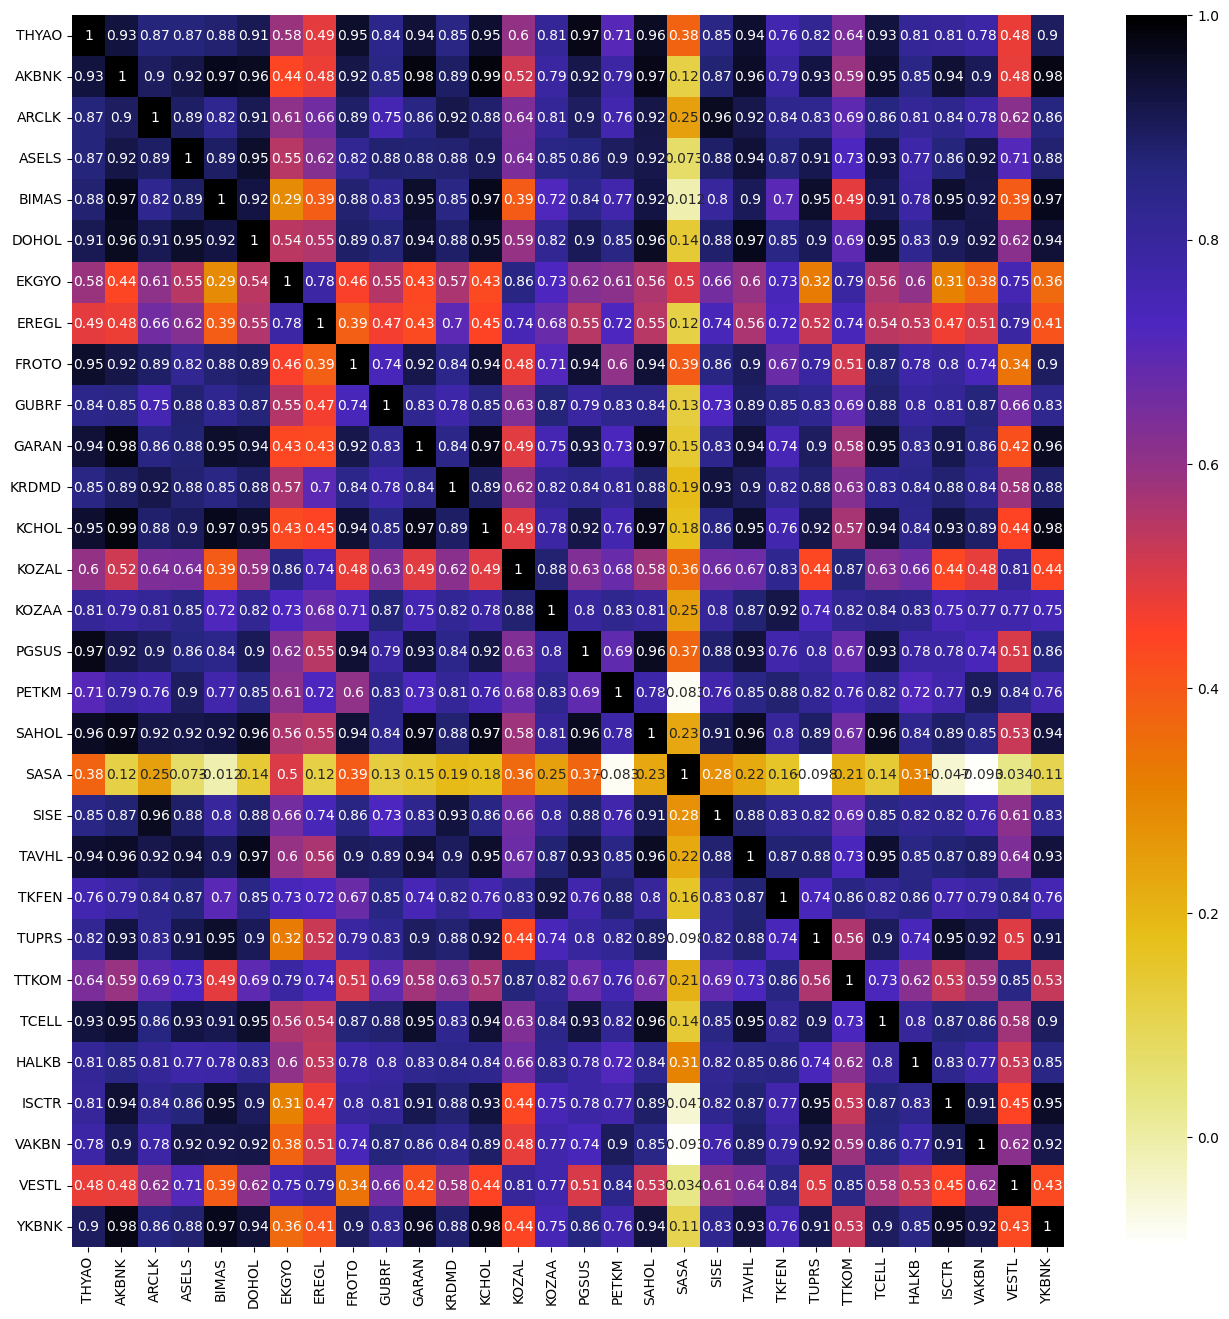

In [307]:
# plotting correlation heatmap
plt.figure(figsize=(16, 16))
heatmap = sns.heatmap(correlation_matrix, cmap=plt.cm.CMRmap_r, annot=True)

# displaying heatmap
heatmap

Following code is taken from a data scientist/youtuber called Krish Naik.

In [308]:
def correlation(dataset, threshold):
    col_corr = []  # List of all the names of correlated columns
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname1 = correlation_matrix.columns[i]
                colname2 = correlation_matrix.columns[j]  # getting the name of column
                col_corr.append([colname1, colname2])
    return col_corr

corr_comps = correlation(merged_df, 0.98)
corr_comps

[['GARAN', 'AKBNK'], ['KCHOL', 'AKBNK']]

Highest correlation pairs are [['GARAN', 'AKBNK'], ['KCHOL', 'AKBNK']] with 98% correlation between them.

<Axes: xlabel='timestamp'>

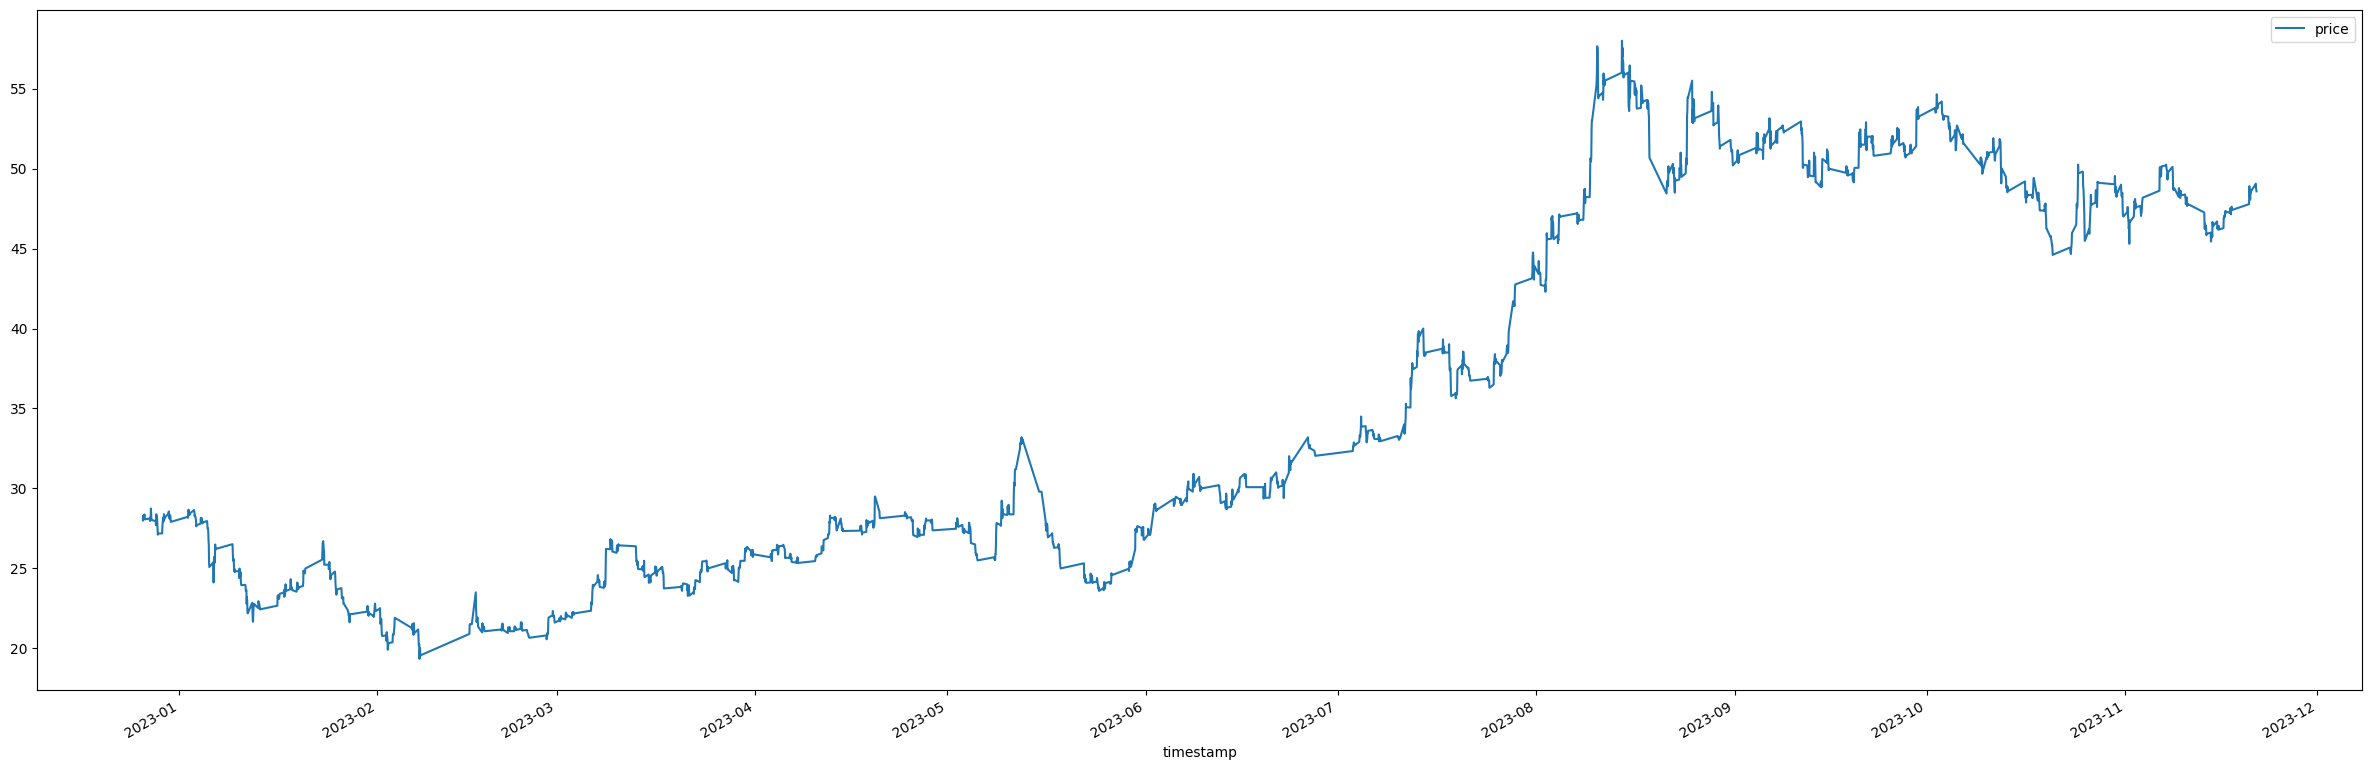

In [309]:
data1[data1["short_name"]=="GARAN"].plot(x="timestamp", y="price")

<Axes: xlabel='timestamp'>

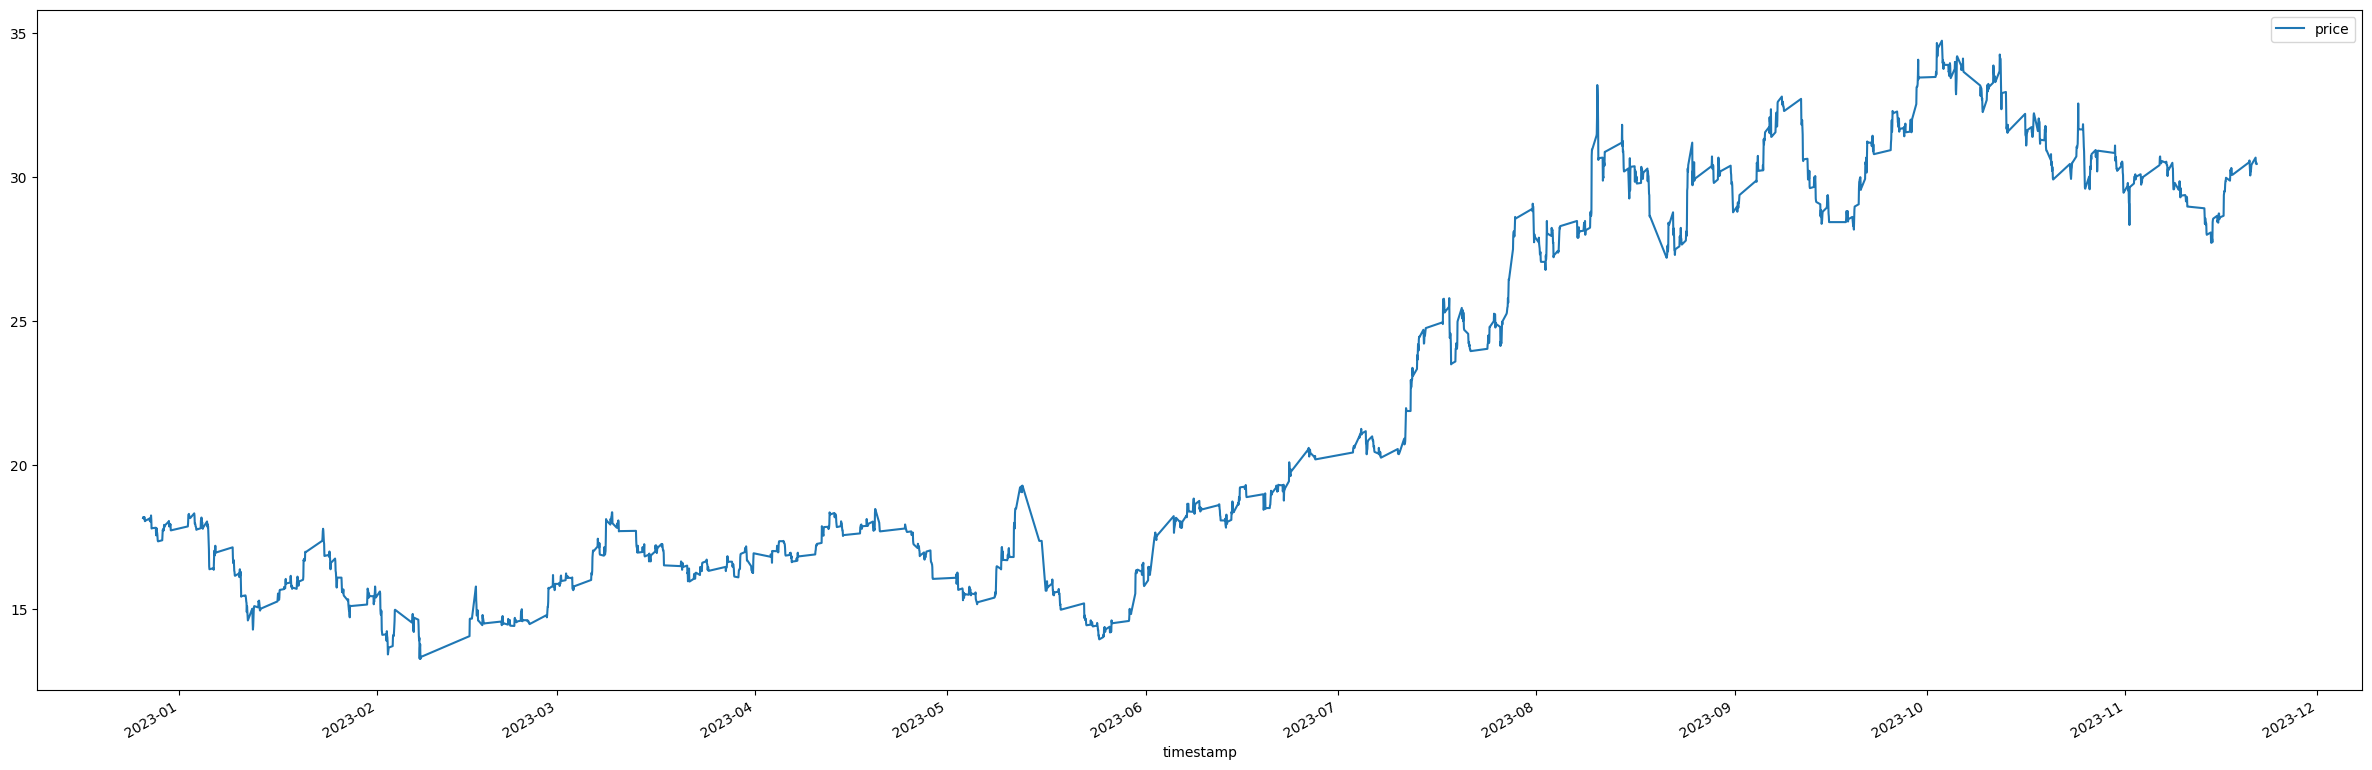

In [310]:
data1[data1["short_name"]=="AKBNK"].plot(x="timestamp", y="price")

In [311]:
diff_df1 = merged_df[["timestamp", "GARAN", "AKBNK"]]
diff_df1

timestamp    GARAN    AKBNK
0    2022-12-26 09:00:00+03:00  28.0022  18.1629
1    2022-12-26 10:00:00+03:00  28.2995  18.1992
2    2022-12-26 11:00:00+03:00  28.2251  18.1629
3    2022-12-26 12:00:00+03:00  28.2995  18.1811
4    2022-12-26 13:00:00+03:00  28.2995  18.1448
...                        ...      ...      ...
2225 2023-11-21 09:00:00+03:00  49.0000  30.6800
2226 2023-11-21 10:00:00+03:00  49.0600  30.4800
2227 2023-11-21 11:00:00+03:00  48.7600  30.4800
2228 2023-11-21 12:00:00+03:00  48.6800  30.5000
2229 2023-11-21 13:00:00+03:00  48.5800  30.4600

[2230 rows x 3 columns]

In [312]:
diff_df1["GARAN-AKBNK"] = np.log1p(diff_df1["GARAN"]-diff_df1["AKBNK"])
diff_df1
"""
diff_df1["GARAN-AKBNK"] = (diff_df1["GARAN"]-diff_df1["AKBNK"])
diff_df1
"""

<ipython-input-312-bc63d12a049f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diff_df1["GARAN-AKBNK"] = np.log1p(diff_df1["GARAN"]-diff_df1["AKBNK"])


'\ndiff_df1["GARAN-AKBNK"] = (diff_df1["GARAN"]-diff_df1["AKBNK"])\ndiff_df1\n'

ChatGPT prompt: Write a code to print acf and pacf.

<Figure size 3000x1000 with 0 Axes>

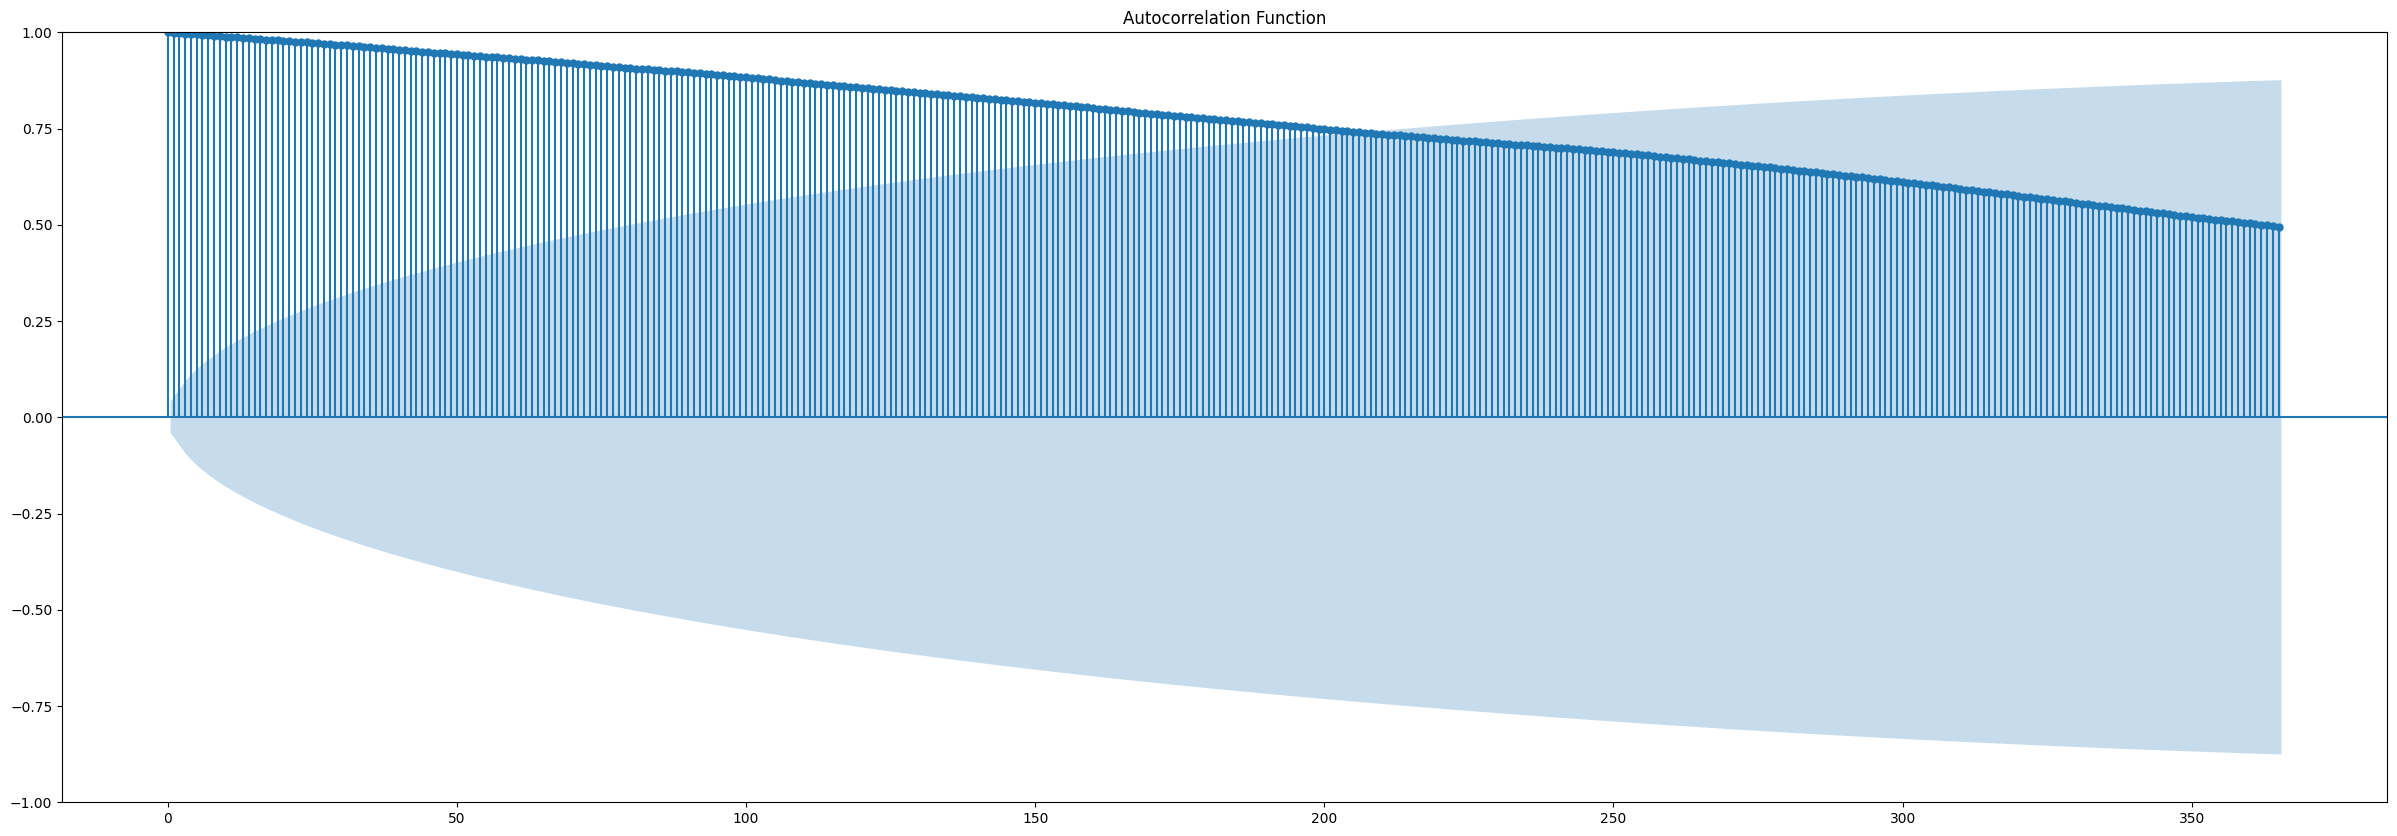

<Figure size 3000x1000 with 0 Axes>

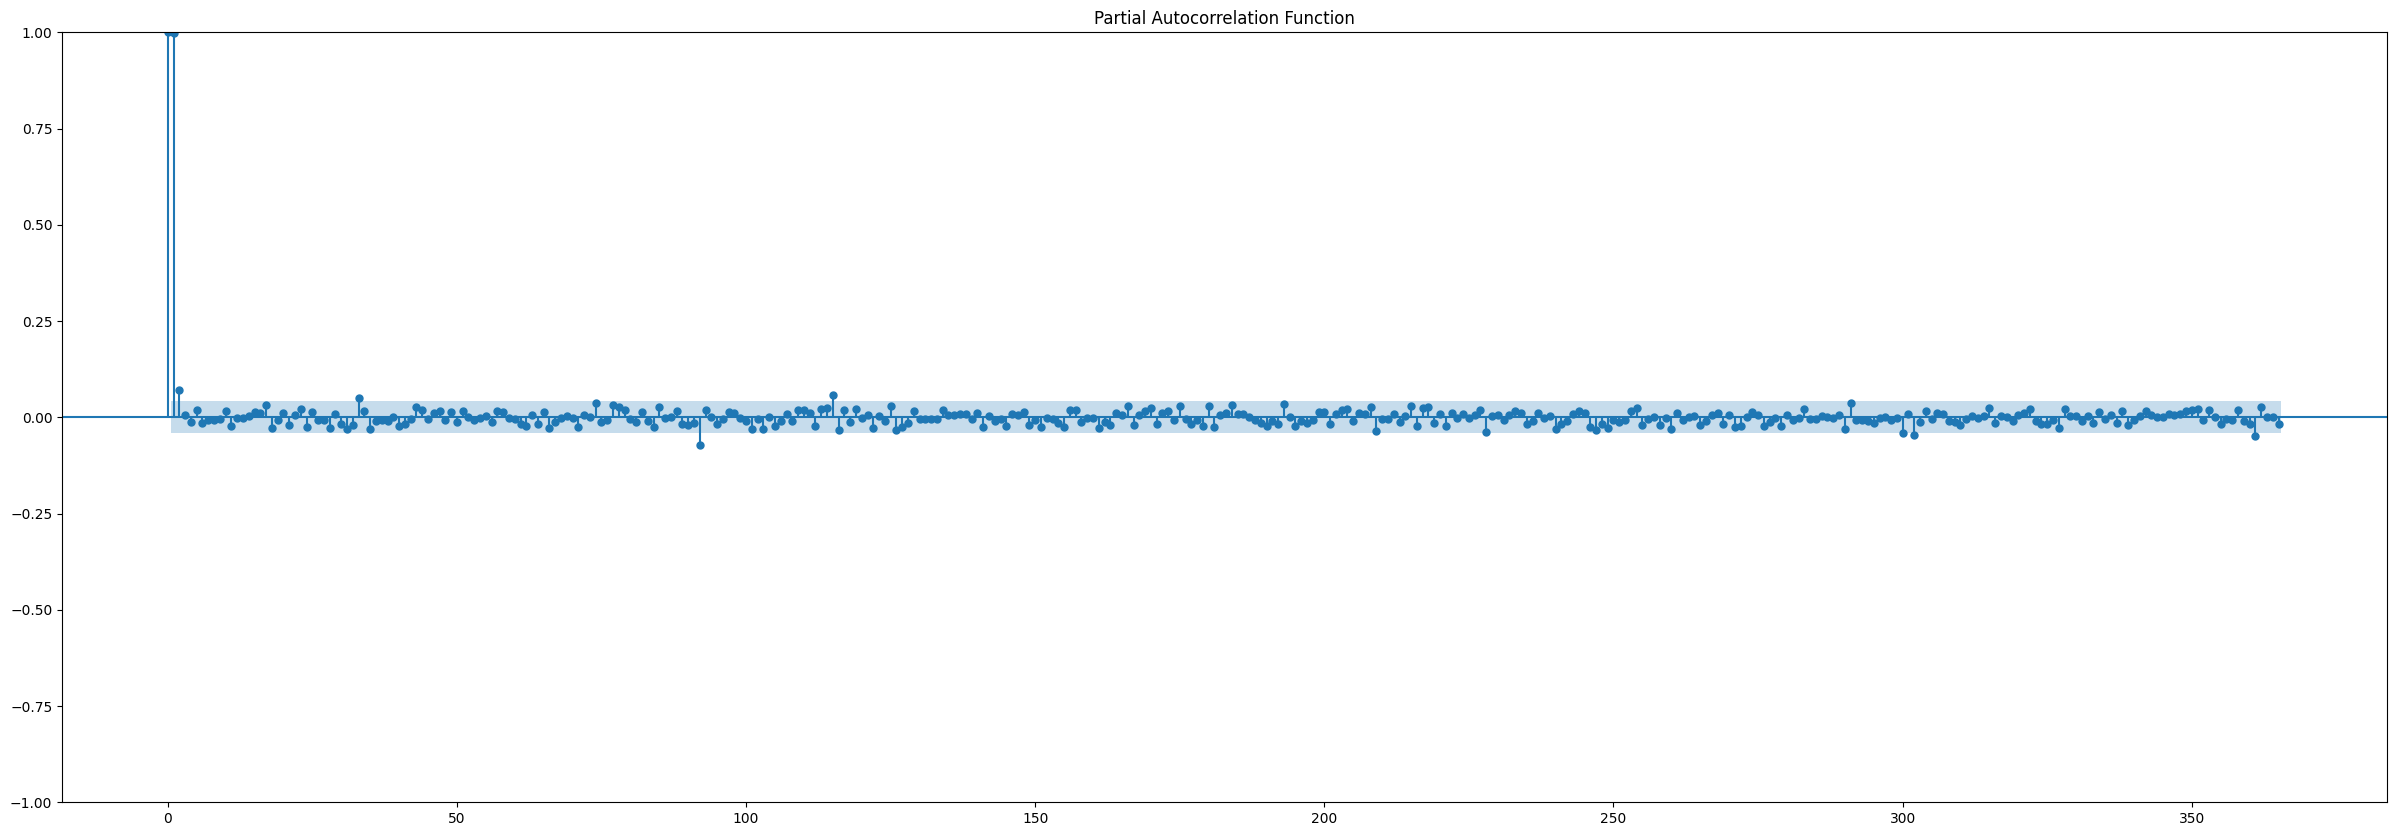

In [313]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
plt.figure()
plot_acf(diff_df1["GARAN-AKBNK"], lags=365, alpha=0.05)  # You can specify the number of lags and the confidence interval
plt.title('Autocorrelation Function')

# Plot PACF
plt.figure()
plot_pacf(diff_df1["GARAN-AKBNK"], lags=365, alpha=0.05)  # You can specify the number of lags and the confidence interval
plt.title('Partial Autocorrelation Function')

plt.show()

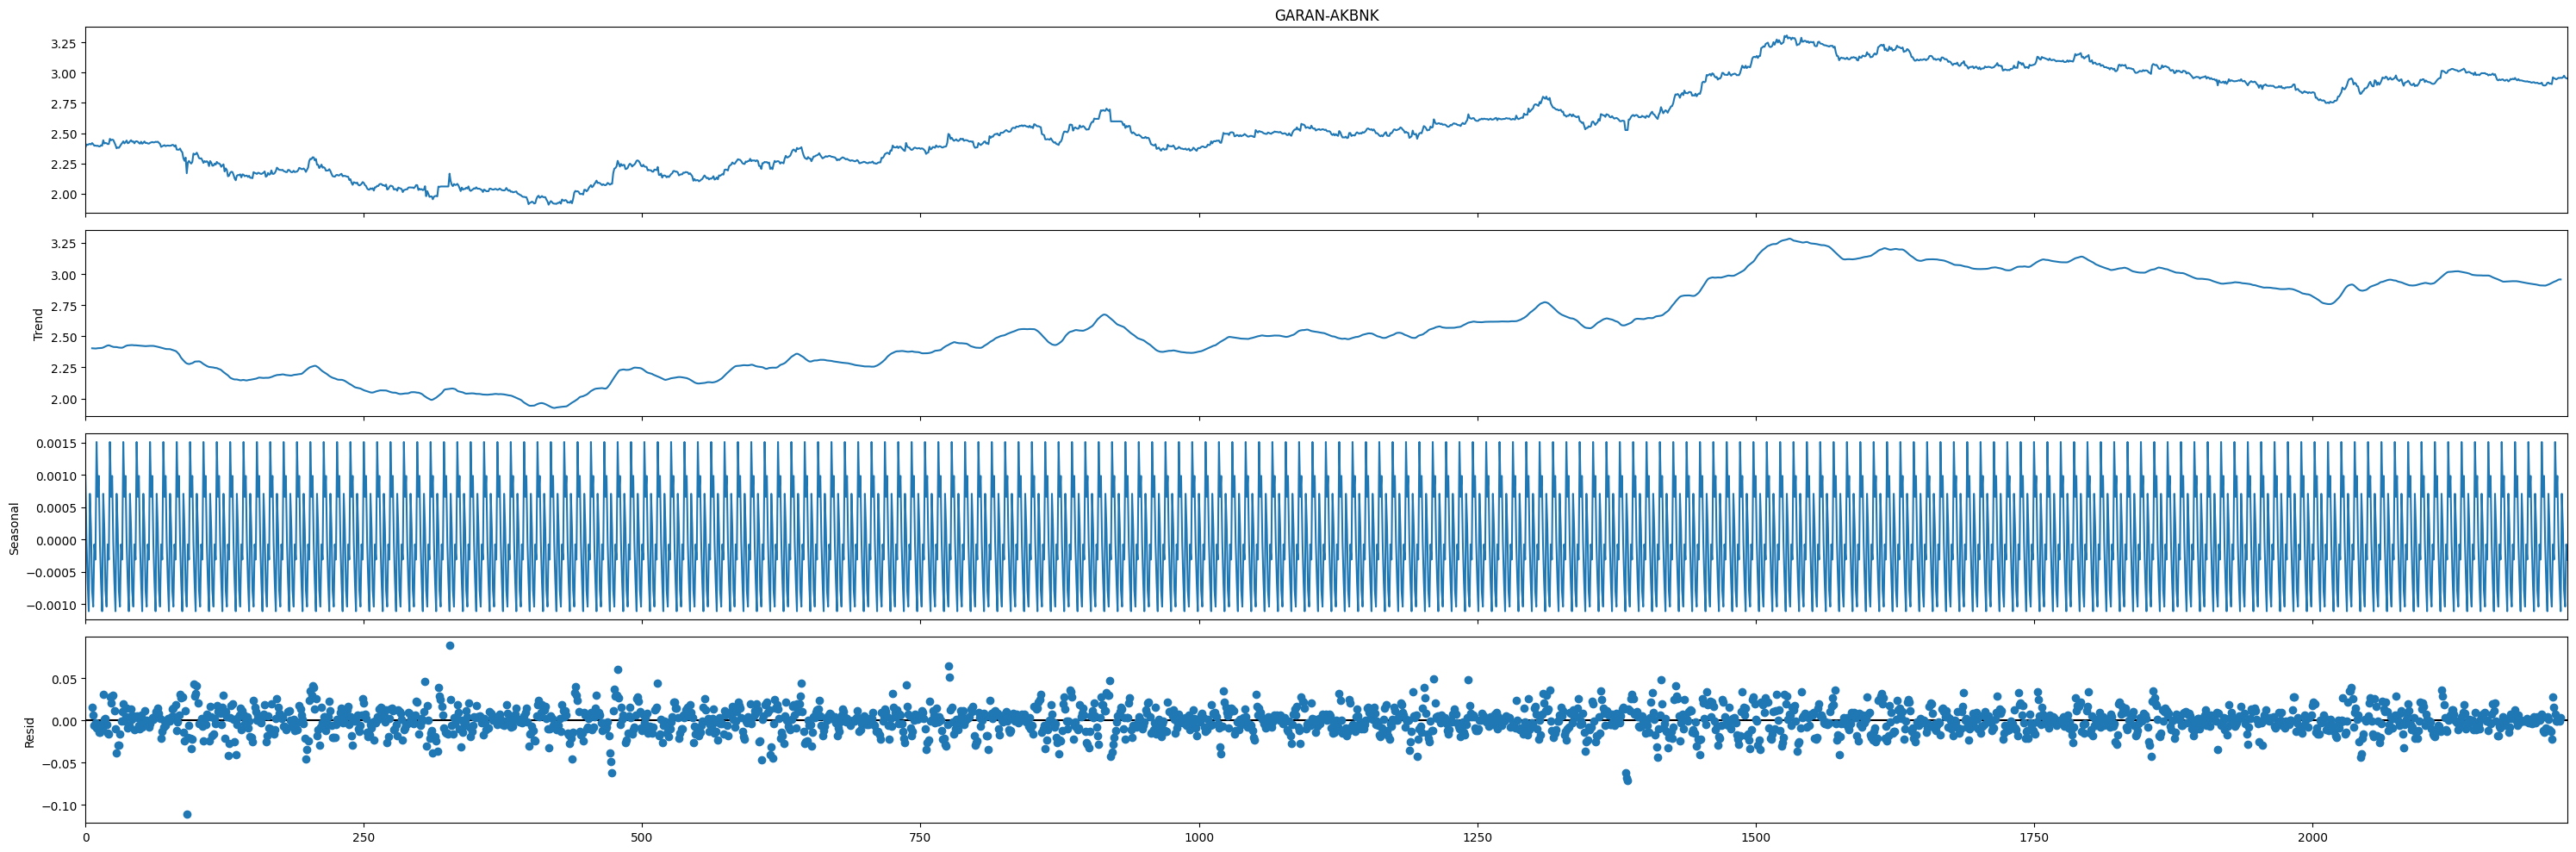

In [314]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
# The frequency is an important parameter that depends on the data's seasonality
# For example, if you have daily data with a weekly cycle, you would use freq=7
result = seasonal_decompose(diff_df1["GARAN-AKBNK"], model='additive', period=12)

# Plot the seasonal decomposition
plt.rcParams.update({'figure.figsize': (30,10)})
result.plot()
plt.show()

ChatGPT prompt: How to do linear regression by using statsmodels?

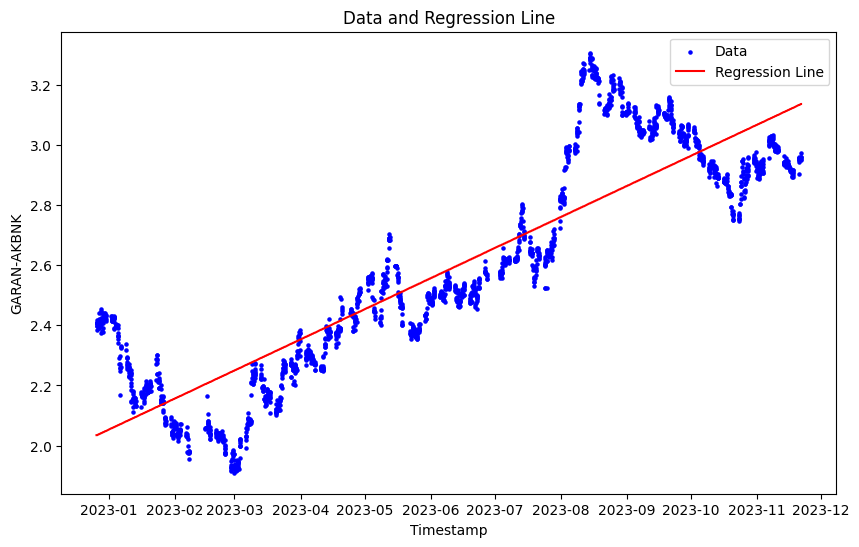

In [315]:
import statsmodels.api as sm
"""
y = diff_df1["GARAN-AKBNK"].values
# Convert datetime to numeric (e.g., number of days since the start date of the dataset)
start_date = diff_df1["timestamp"].min()
X = (diff_df1["timestamp"] - start_date).dt.days.values

# Linear regression
model = sm.OLS(y, X).fit()
"""
# Response variable
y = diff_df1["GARAN-AKBNK"].values

# Predictor variable (with a constant added for the intercept term)
X = (diff_df1["timestamp"] - diff_df1["timestamp"].min()).dt.days.values
X = sm.add_constant(X)  # Adds a constant term to the predictor

# Linear regression
model = sm.OLS(y, X).fit()

# Make predictions using the model
predictions = model.predict(X)
plt.figure(figsize=(10,6))
# Plot the original data
plt.scatter(diff_df1["timestamp"], y, label='Data', color='blue', s=5, marker='o')

# Plot the regression line
plt.plot(diff_df1["timestamp"], predictions, label='Regression Line', color='red')


# Formatting plot with title and labels
plt.title('Data and Regression Line')
plt.xlabel('Timestamp')
plt.ylabel('GARAN-AKBNK')
plt.legend()

# Show the plot
plt.show()



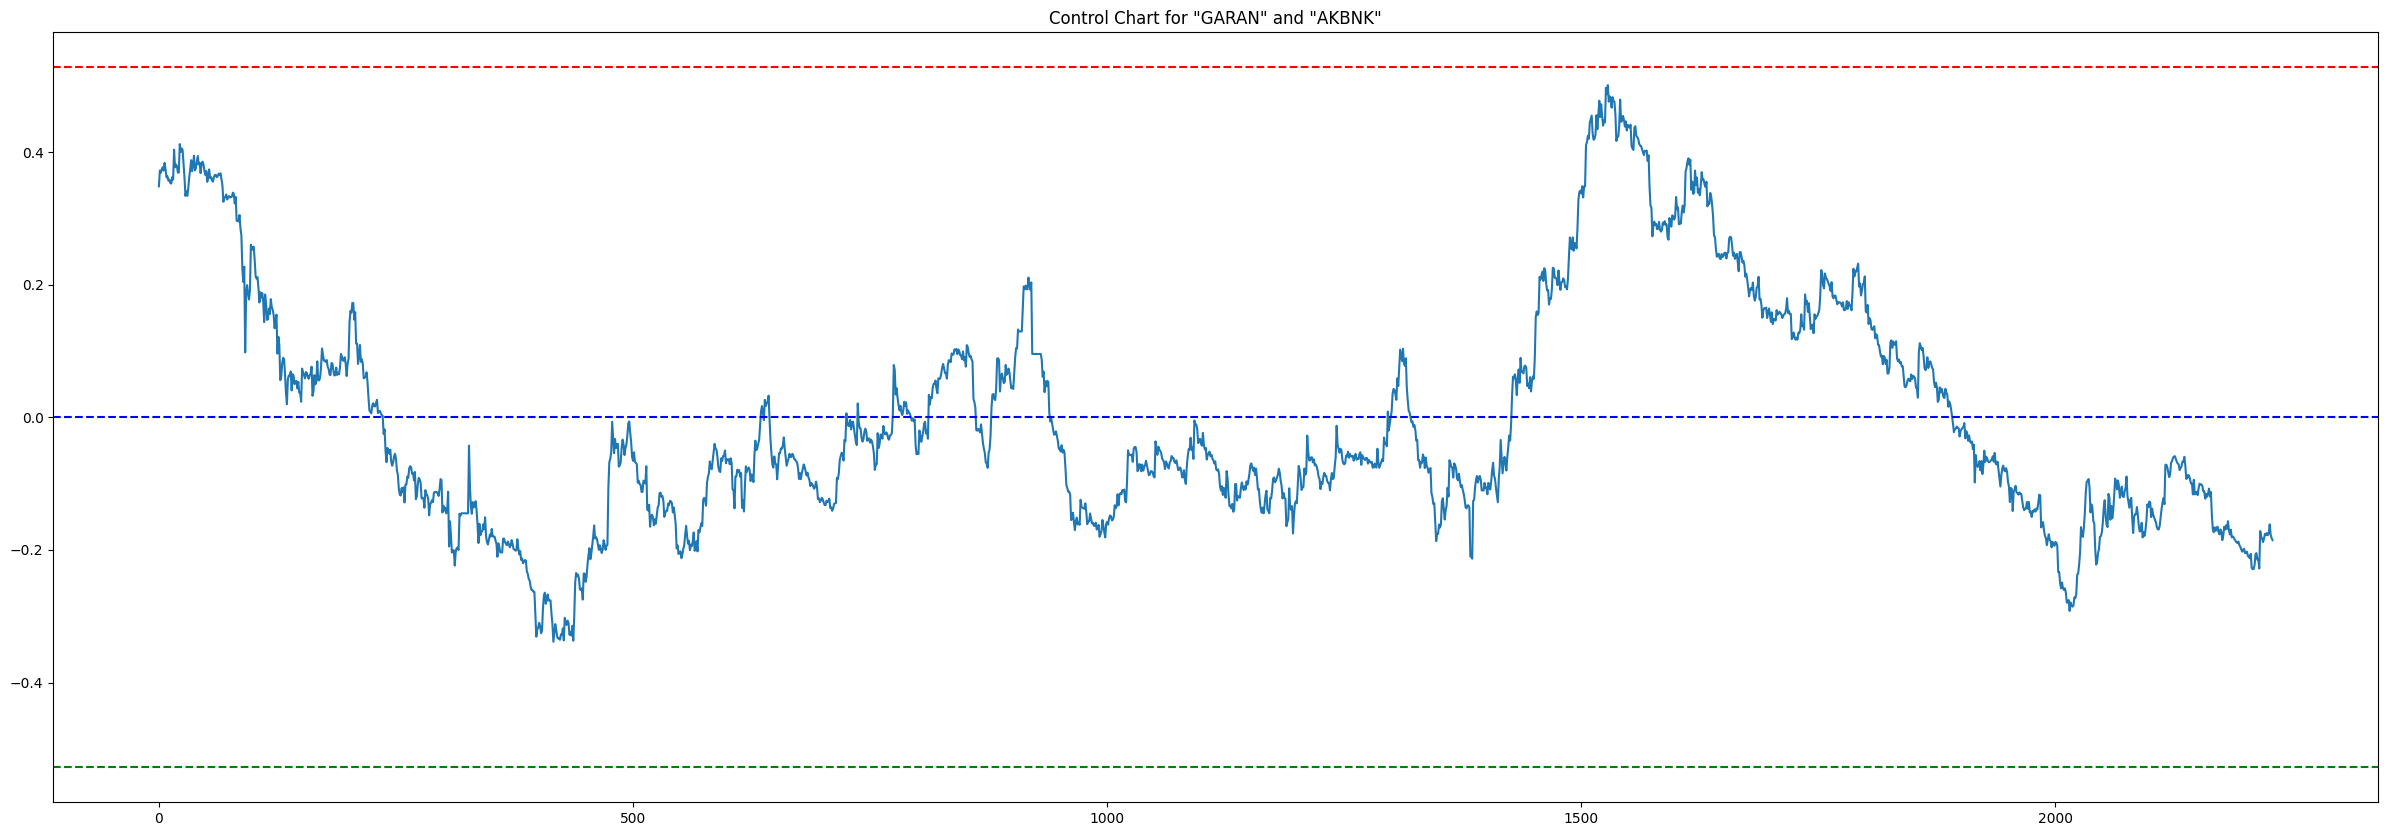

In [316]:
# Calculate residuals
residuals = model.resid

# Calculate control limits
mean_residual = np.mean(residuals)
std_residual = np.std(residuals)
upper_control_limit = mean_residual + 3 * std_residual
lower_control_limit = mean_residual - 3 * std_residual

# Plot control chart
plt.plot(residuals)
plt.axhline(mean_residual, color='blue', linestyle='--')
plt.axhline(upper_control_limit, color='red', linestyle='--')
plt.axhline(lower_control_limit, color='green', linestyle='--')
plt.title(f'Control Chart for "GARAN" and "AKBNK"')
plt.show()

In [317]:
model.rsquared

0.7696509725770251

### First Question Second Pair

<Axes: xlabel='timestamp'>

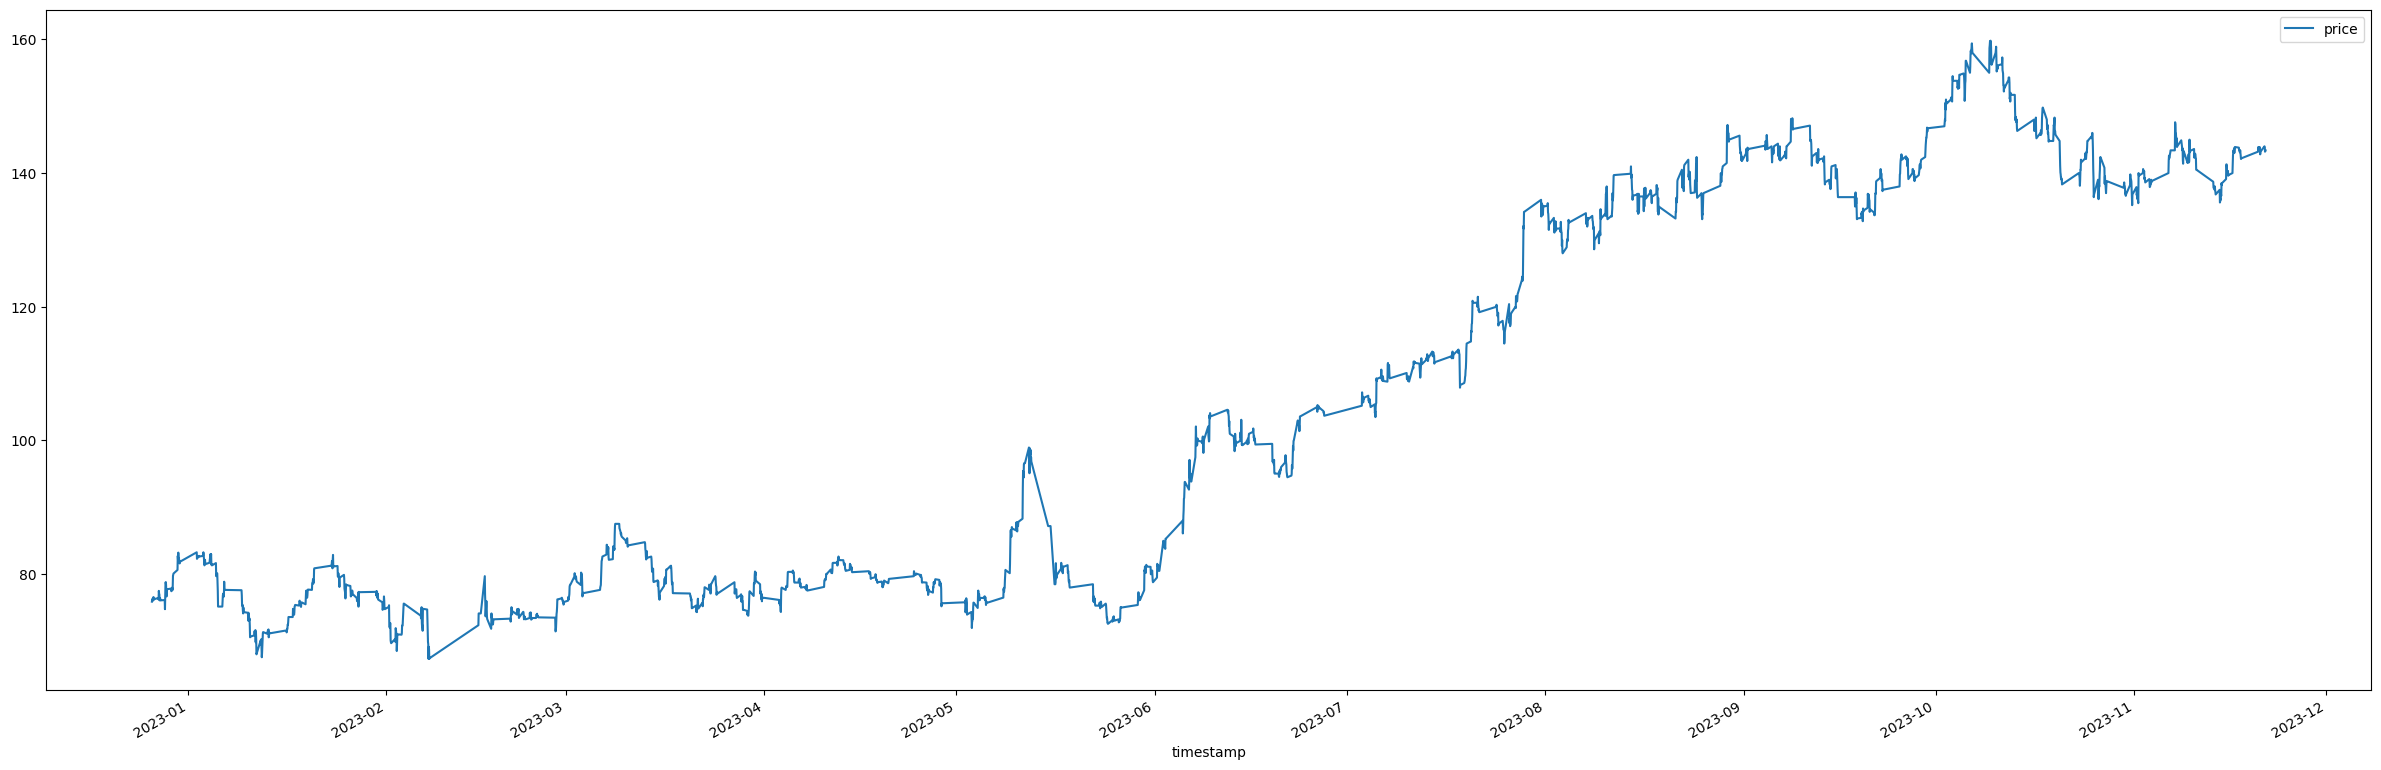

In [318]:
data1[data1["short_name"]=="KCHOL"].plot(x="timestamp", y="price")

<Axes: xlabel='timestamp'>

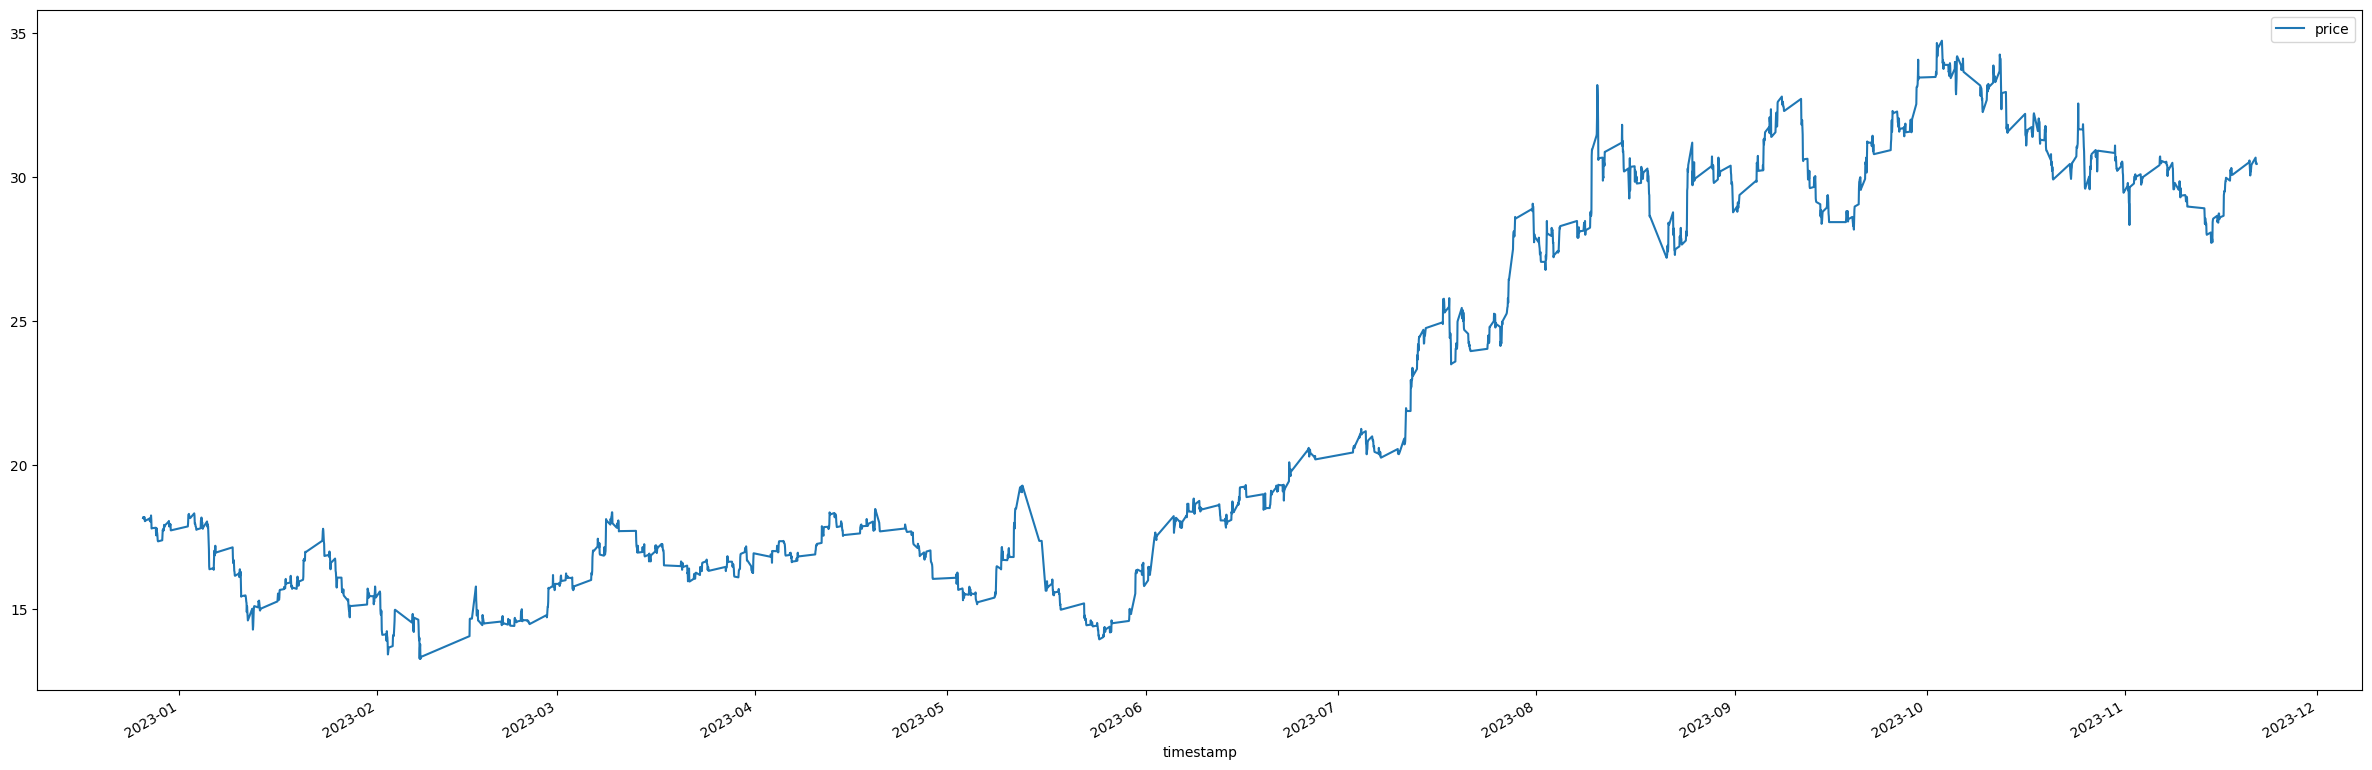

In [319]:
data1[data1["short_name"]=="AKBNK"].plot(x="timestamp", y="price")

In [320]:
diff_df2 = merged_df[["timestamp", "KCHOL", "AKBNK"]]
diff_df2["KCHOL-AKBNK"] = diff_df2["KCHOL"]-diff_df2["AKBNK"]

diff_df2

<ipython-input-320-6b65916dd509>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diff_df2["KCHOL-AKBNK"] = diff_df2["KCHOL"]-diff_df2["AKBNK"]


timestamp     KCHOL    AKBNK  KCHOL-AKBNK
0    2022-12-26 09:00:00+03:00   75.8945  18.1629      57.7316
1    2022-12-26 10:00:00+03:00   76.1879  18.1992      57.9887
2    2022-12-26 11:00:00+03:00   76.3346  18.1629      58.1717
3    2022-12-26 12:00:00+03:00   76.2368  18.1811      58.0557
4    2022-12-26 13:00:00+03:00   76.0412  18.1448      57.8964
...                        ...       ...      ...          ...
2225 2023-11-21 09:00:00+03:00  144.0000  30.6800     113.3200
2226 2023-11-21 10:00:00+03:00  143.9000  30.4800     113.4200
2227 2023-11-21 11:00:00+03:00  143.2000  30.4800     112.7200
2228 2023-11-21 12:00:00+03:00  143.4000  30.5000     112.9000
2229 2023-11-21 13:00:00+03:00  143.4000  30.4600     112.9400

[2230 rows x 4 columns]

<Figure size 3000x1000 with 0 Axes>

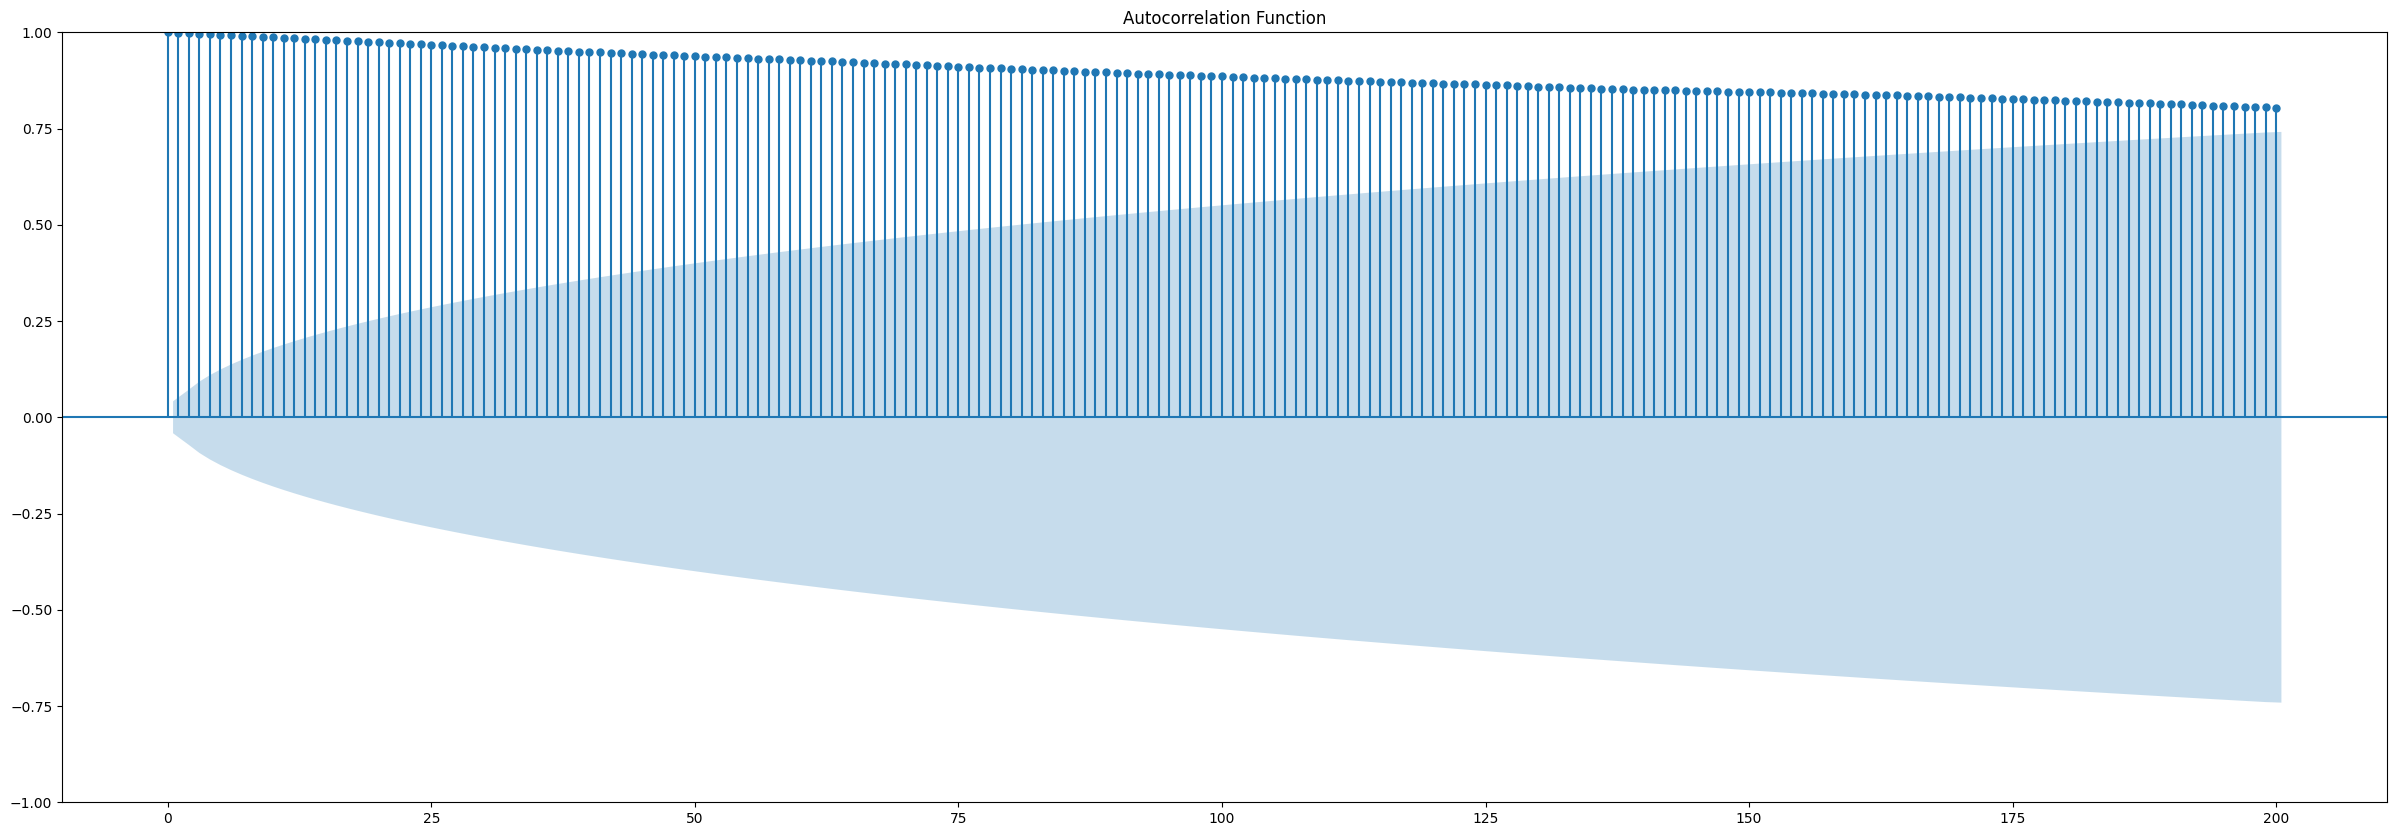

<Figure size 3000x1000 with 0 Axes>

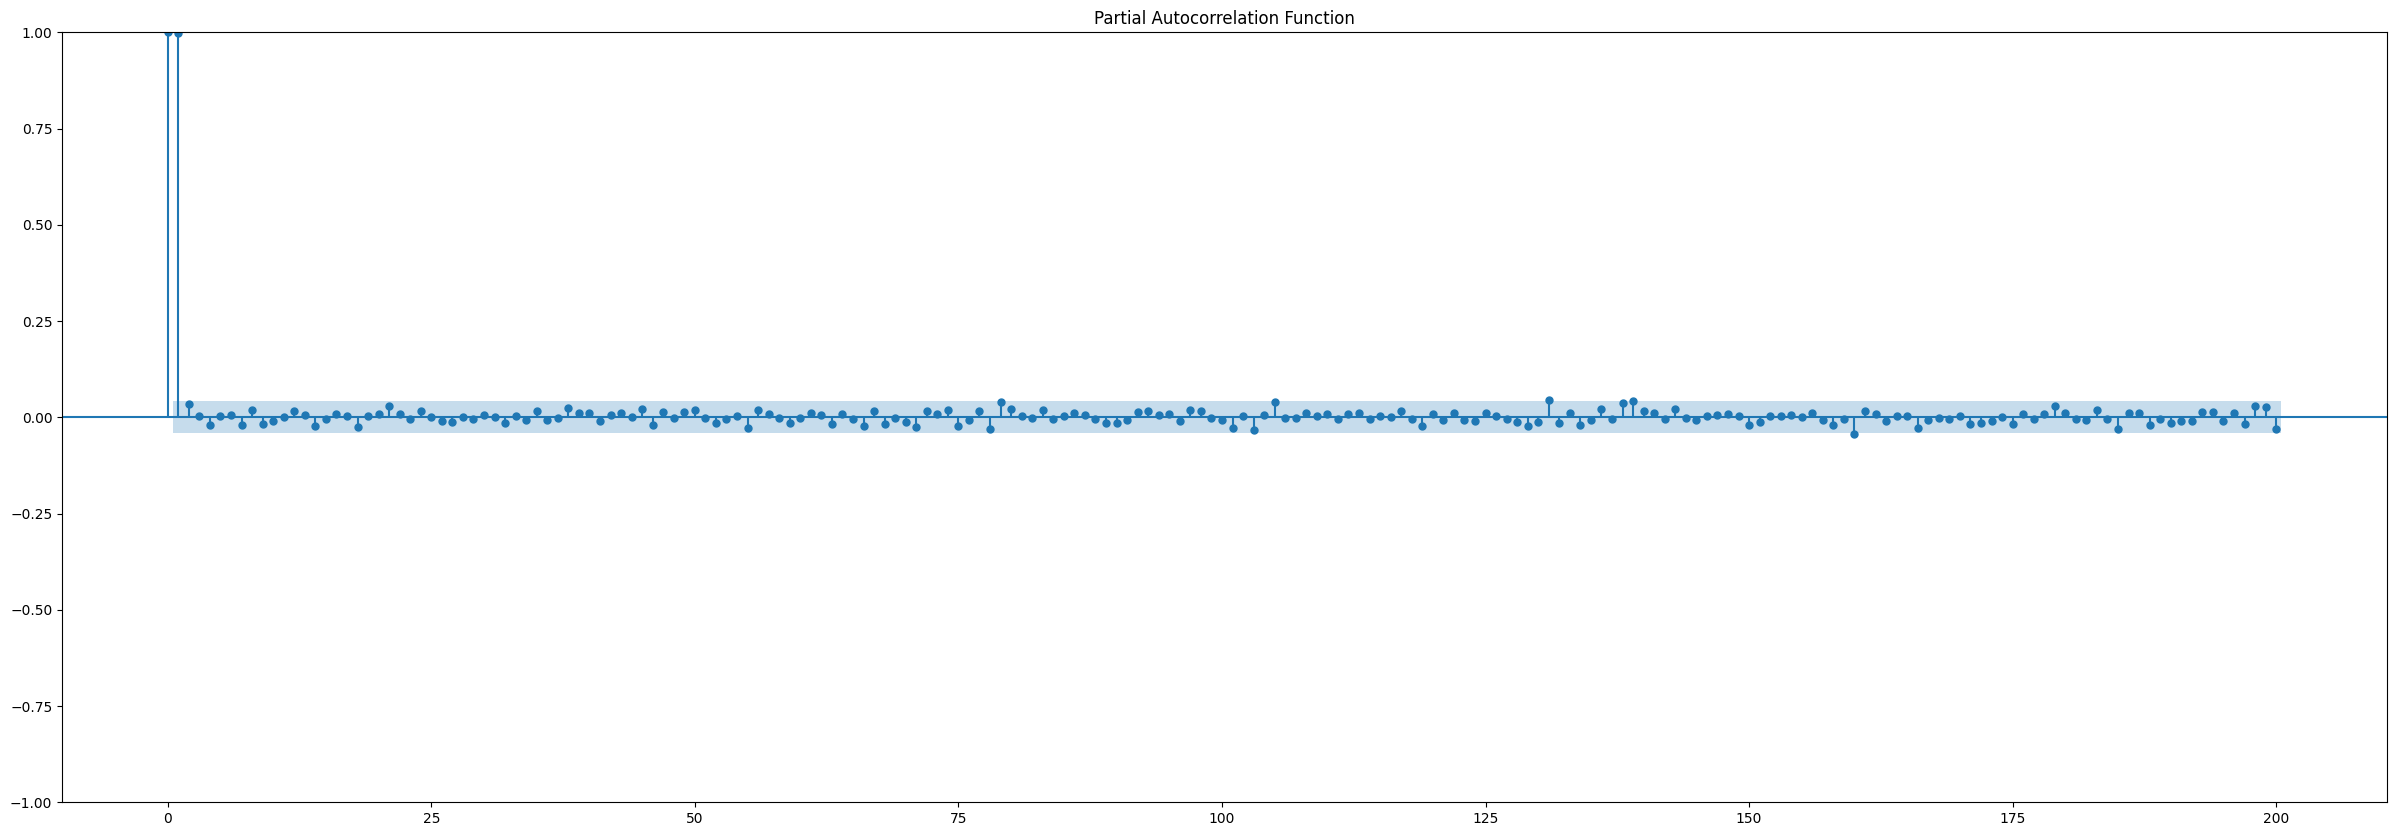

In [321]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
plt.figure()
plot_acf(diff_df2["KCHOL-AKBNK"], lags=200, alpha=0.05)  # You can specify the number of lags and the confidence interval
plt.title('Autocorrelation Function')

# Plot PACF
plt.figure()
plot_pacf(diff_df2["KCHOL-AKBNK"], lags=200, alpha=0.05)  # You can specify the number of lags and the confidence interval
plt.title('Partial Autocorrelation Function')

plt.show()

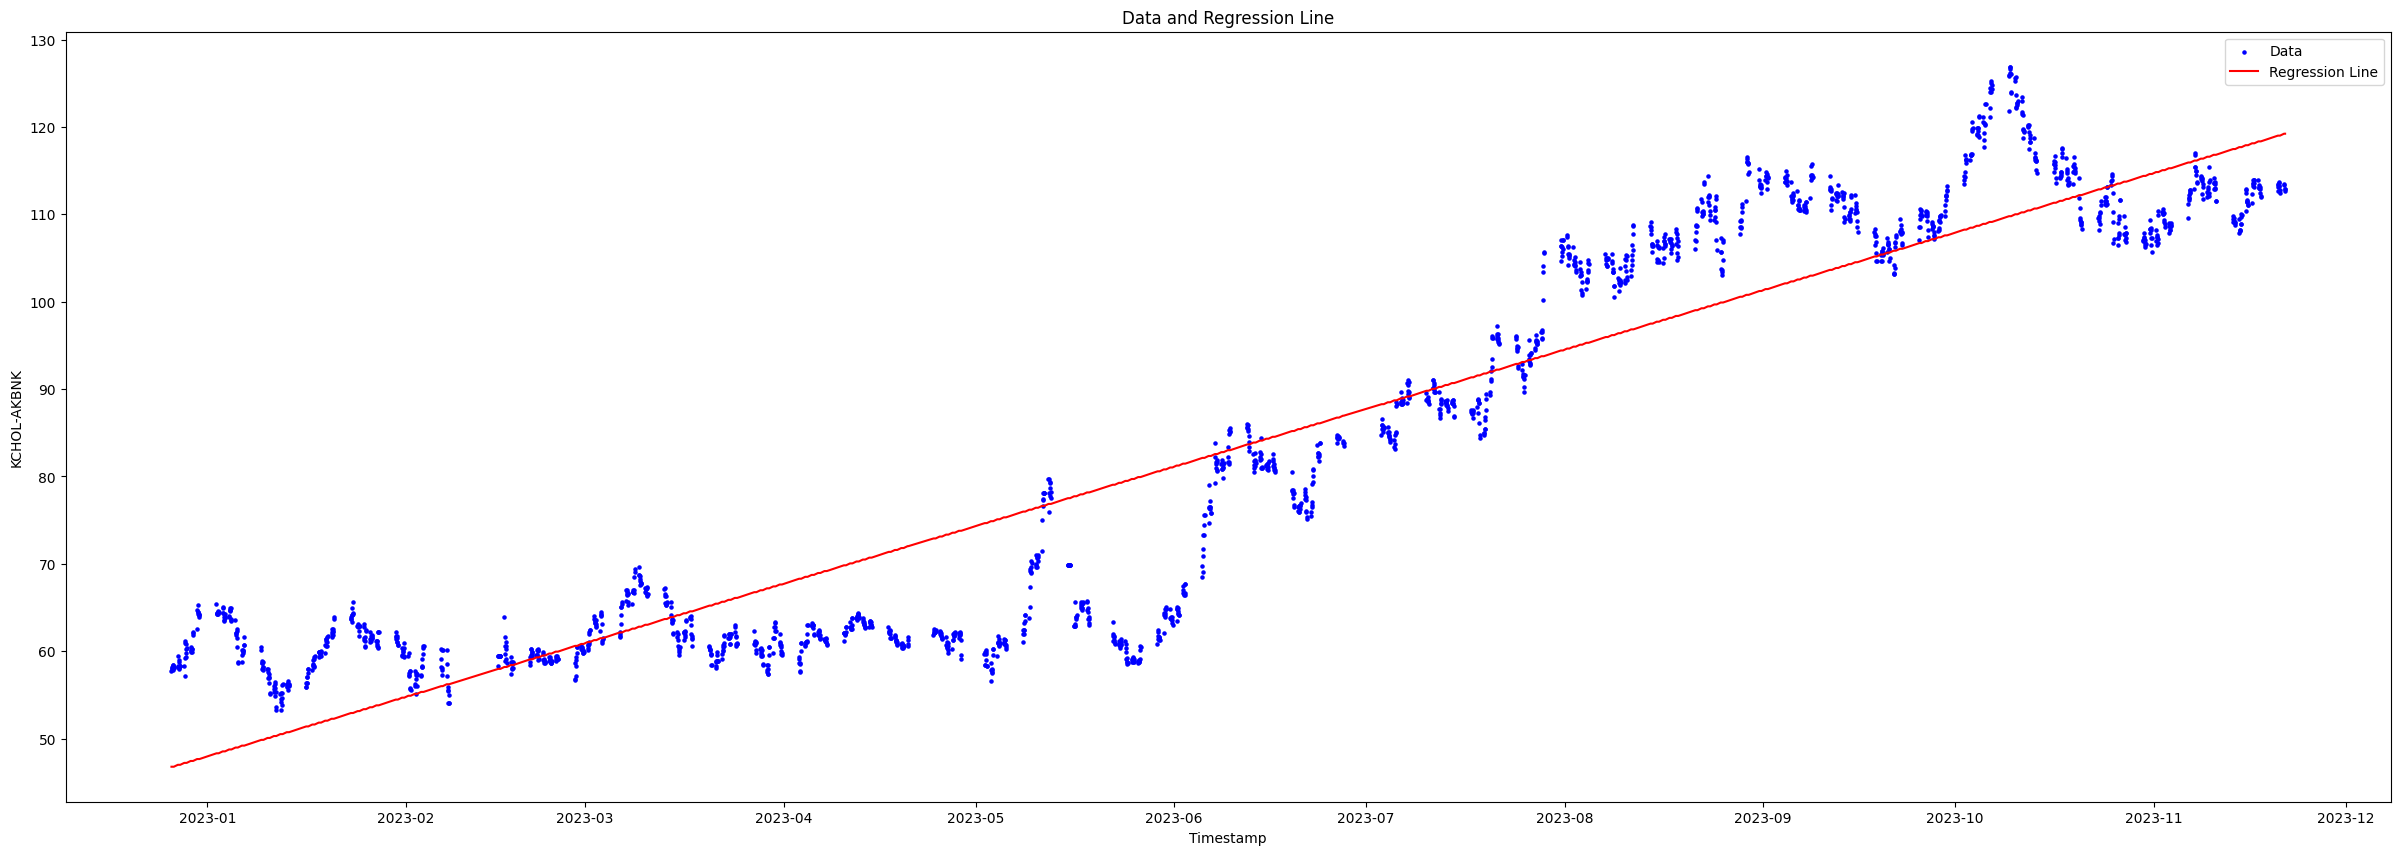

In [322]:
import statsmodels.api as sm
"""
y = diff_df2["KCHOL-AKBNK"].values
# Convert datetime to numeric (e.g., number of days since the start date of the dataset)
start_date = diff_df2["timestamp"].min()
X = (diff_df2["timestamp"] - start_date).dt.days.values

# Linear regression
model = sm.OLS(y, X).fit()

"""
# Response variable
y = diff_df2["KCHOL-AKBNK"].values

# Predictor variable (with a constant added for the intercept term)
X = (diff_df2["timestamp"] - diff_df2["timestamp"].min()).dt.days.values
X = sm.add_constant(X)  # Adds a constant term to the predictor

# Linear regression
model = sm.OLS(y, X).fit()

# Make predictions using the model
predictions = model.predict(X)

# Plot the original data
plt.scatter(diff_df2["timestamp"], y, label='Data', color='blue', s=5, marker='o')

# Plot the regression line
plt.plot(diff_df2["timestamp"], predictions, label='Regression Line', color='red')

# Formatting plot with title and labels
plt.title('Data and Regression Line')
plt.xlabel('Timestamp')
plt.ylabel('KCHOL-AKBNK')
plt.legend()

# Show the plot
plt.show()


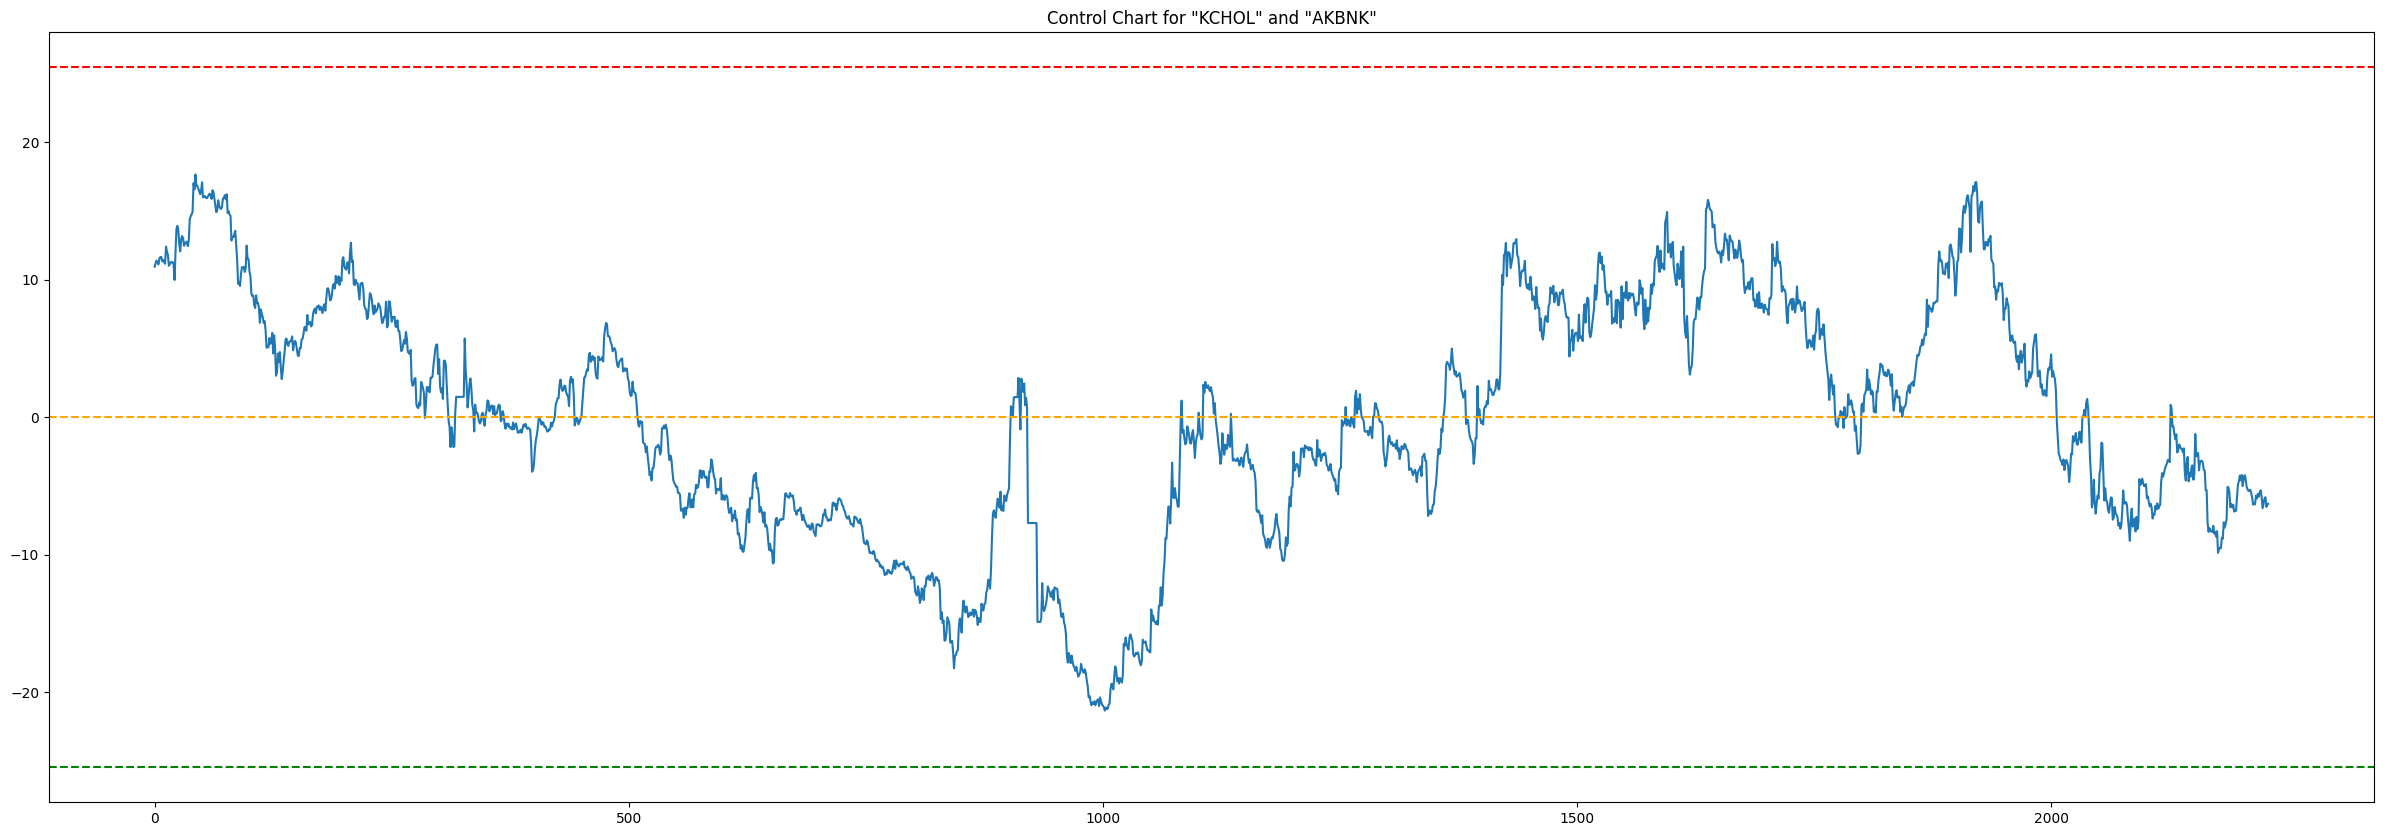

In [323]:
# Calculate residuals
residuals = model.resid

# Calculate control limits
mean_residual = np.mean(residuals)
std_residual = np.std(residuals)
upper_control_limit = mean_residual + 3 * std_residual
lower_control_limit = mean_residual - 3 * std_residual

# Plot control chart
plt.plot(residuals)
plt.axhline(mean_residual, color='orange', linestyle='--')
plt.axhline(upper_control_limit, color='red', linestyle='--')
plt.axhline(lower_control_limit, color='green', linestyle='--')
plt.title(f'Control Chart for "KCHOL" and "AKBNK"')
plt.show()

In [324]:
model.rsquared

0.8615573840921081

**Effectiveness of the Approach**

**Since there are no out of control points observed in control charts, there were no trade opportunities so we did not make any transactions and made no profit.**

## Second Part

We chose to do this part with ARIMA because ARIMA models can account for various patterns, constant or varying volatility, and seasonal or non-seasonal fluctuations. ARIMA models are also easy to implement and interpret, as they only require a few parameters.


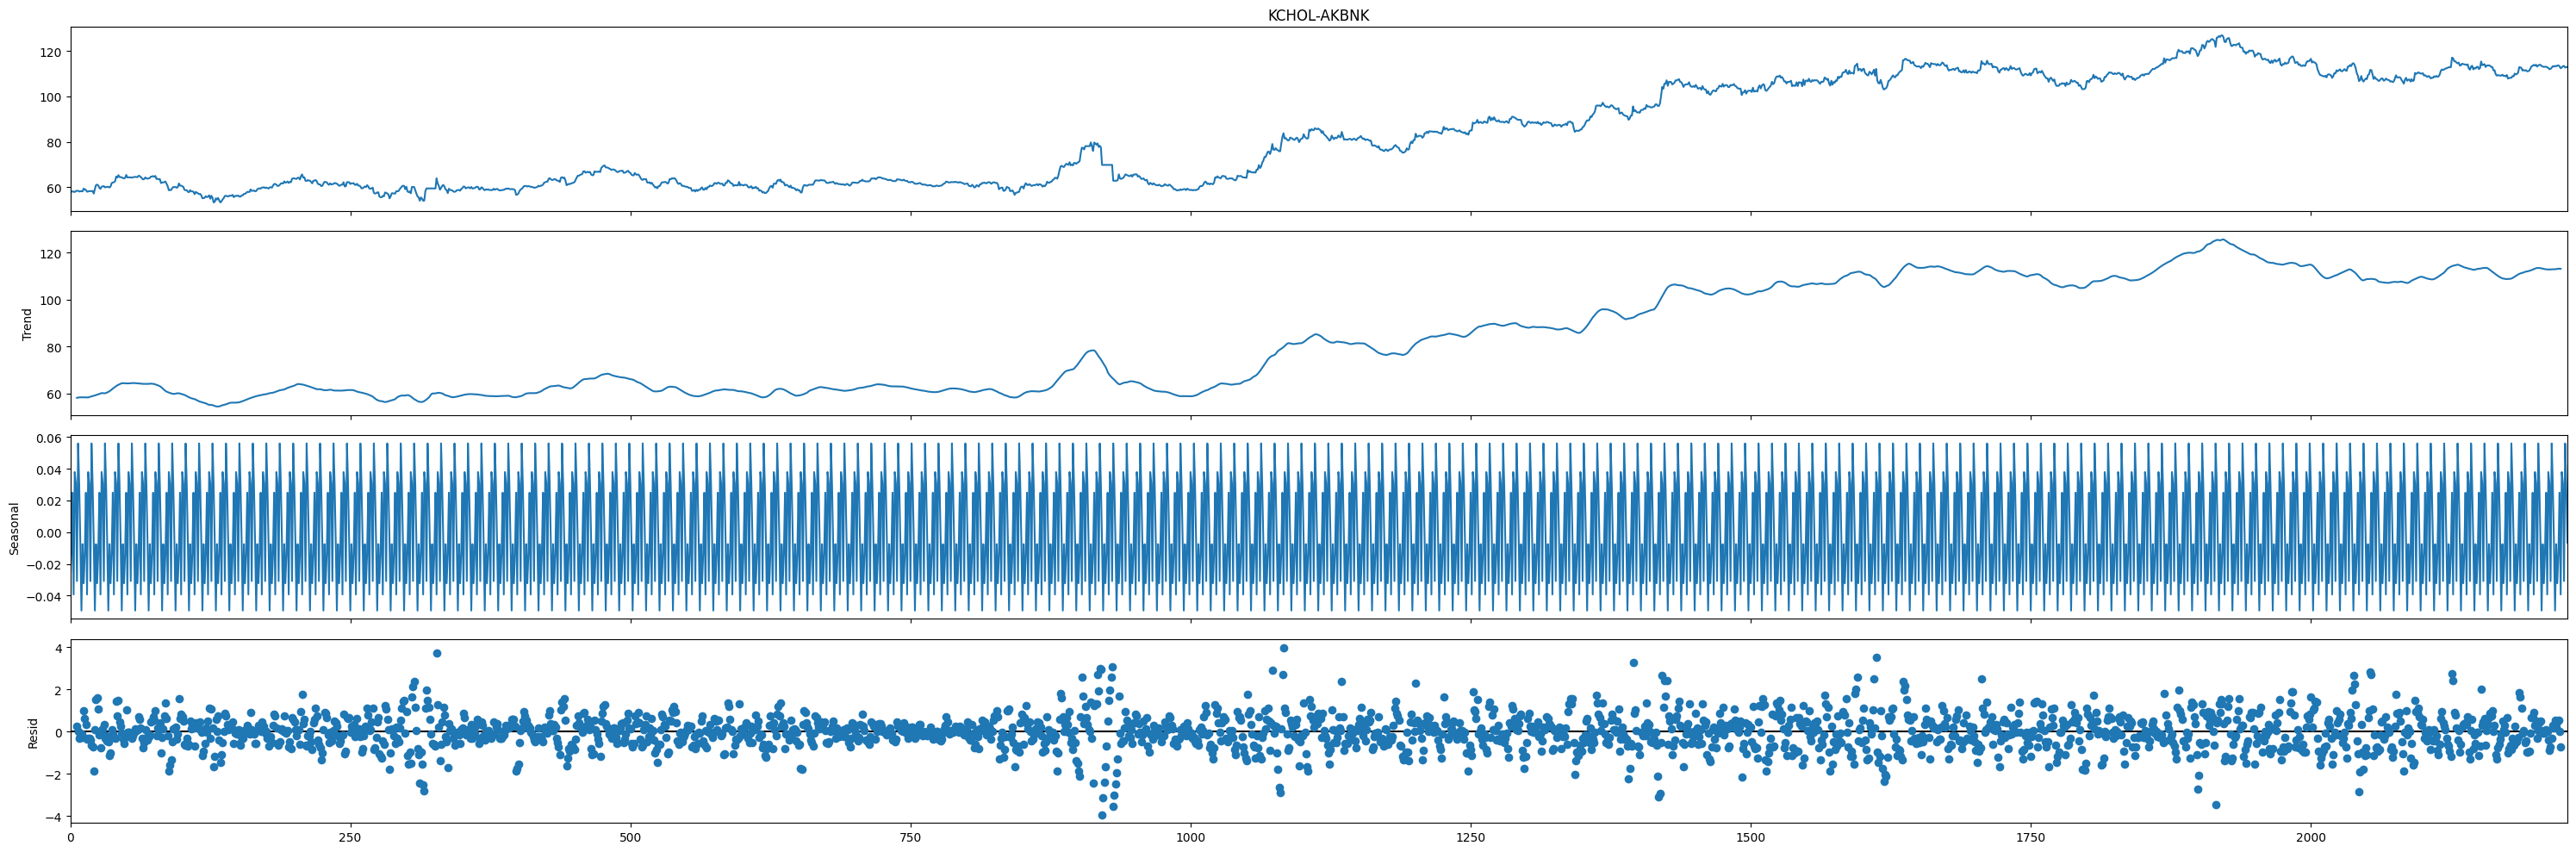

In [325]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
# The frequency is an important parameter that depends on the data's seasonality
# For example, if you have daily data with a weekly cycle, you would use freq=7
result = seasonal_decompose(diff_df2["KCHOL-AKBNK"], model='additive', period=12)

# Plot the seasonal decomposition
plt.rcParams.update({'figure.figsize': (30,10)})
result.plot()
plt.show()

In [326]:
!pip install pmdarima

In [327]:
diff_df1.set_index('timestamp', inplace=True)

ChatGPT prompt: Write arima function in the python, print the residuals.

In [328]:
import pmdarima as pm

# Fit the Auto ARIMA model
model = pm.auto_arima(diff_df1[["GARAN-AKBNK"]], start_p=1, start_q=1,
                      test='adf',       # Use the Augmented Dickey-Fuller test to find optimal 'd'
                      max_p=3, max_q=3, max_P=3, max_Q=3, # Maximum p and q
                      m=12,              # Frequency of the series
                      d=None, D=None,           # Let the model determine 'd'
                      seasonal=True,    # Seasonality
                      start_P=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True
                                )

# Print the summary
print(model.summary())

# Print the residuals
residuals = model.resid()
print("Residuals:")
print(residuals)

# Forecasting (optional)
n_periods = 5
forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)
print(f"Forecast: {forecast}")
print(f"Confidence Intervals: {conf_int}")

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=-12081.008, Time=1.98 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-12069.944, Time=0.18 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-12082.611, Time=1.48 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-12082.940, Time=0.63 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-12071.388, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=-12084.912, Time=0.20 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=-12082.949, Time=0.59 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=-12080.940, Time=1.60 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=-12082.982, Time=1.20 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=-12082.990, Time=1.15 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=-12084.570, Time=1.02 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=-12080.905, Time=1.52 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=-12086.244, Time=0.19 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=-12084.280, Time=

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


The function chose ARIMA(0,1,1) as the best model that fits the data. Its AIC value is the lowest of all models.

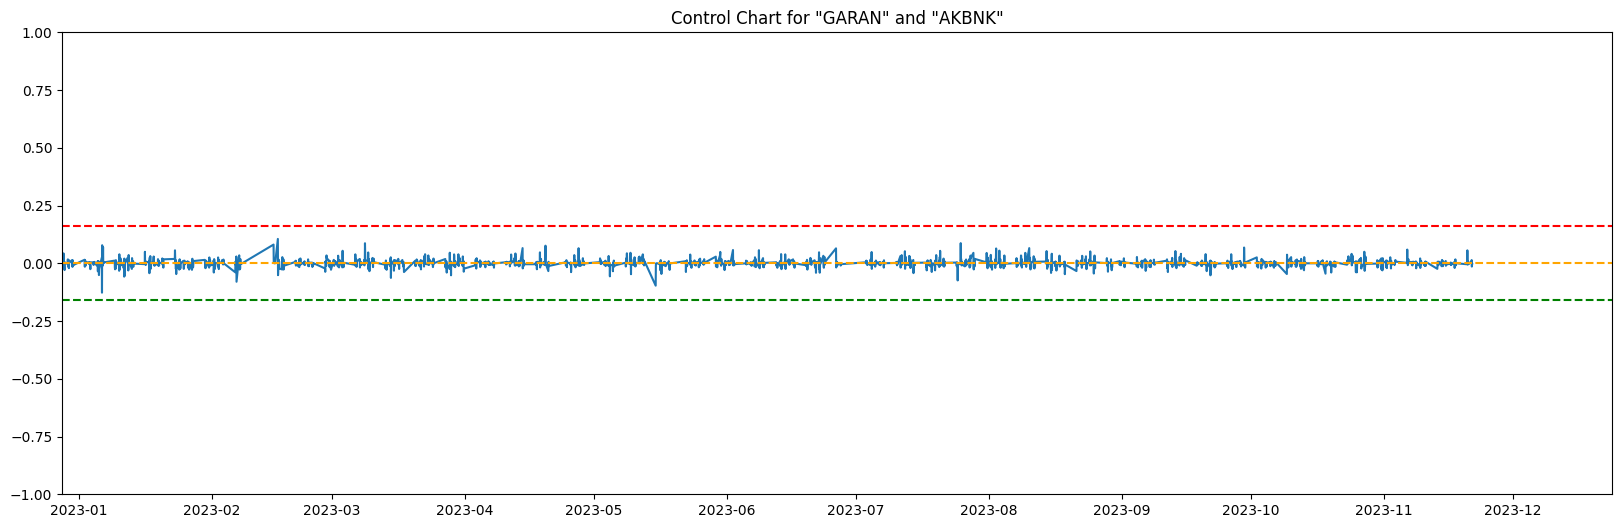

In [329]:
# Ensure residuals.index is a DateTimeIndex
residuals.index = pd.to_datetime(residuals.index)

start_date = dt.datetime.strptime("2022-12-28", "%Y-%m-%d")
end_date = dt.datetime.strptime("2023-12-24", "%Y-%m-%d")

# Calculate control limits
mean_residual = np.mean(residuals)
std_residual = np.std(residuals)
upper_control_limit1 = mean_residual + 3 * std_residual
lower_control_limit1 = mean_residual - 3 * std_residual

# Plot control chart
plt.figure(figsize=(20,6))
plt.plot(residuals)
plt.axhline(mean_residual, color='orange', linestyle='--')
plt.axhline(upper_control_limit1, color='red', linestyle='--')
plt.axhline(lower_control_limit1, color='green', linestyle='--')

plt.title(f'Control Chart for "GARAN" and "AKBNK"')

plt.ylim(-1,1)
plt.xlim(start_date, end_date)
plt.show()

In [330]:
# Filter the DataFrame for points where residuals exceed the control limits
out_of_control_points = residuals[(residuals > upper_control_limit1) | (residuals < lower_control_limit1)]
out_of_control_points

timestamp
2022-12-26 09:00:00+03:00    2.383178
dtype: float64

In [331]:
# Extract the dates for these points
out_of_control_dates = out_of_control_points.index
out_of_control_dates

DatetimeIndex(['2022-12-26 09:00:00+03:00'], dtype='datetime64[ns, pytz.FixedOffset(180)]', name='timestamp', freq=None)

In [332]:
for time in out_of_control_dates:
    out_of_controls = diff_df1[diff_df1.index == time]
    print(out_of_controls)

                             GARAN    AKBNK  GARAN-AKBNK
timestamp                                               
2022-12-26 09:00:00+03:00  28.0022  18.1629     2.383178


A control chart has been constructed according to the ARIMA model containing 3-sigma limits. The model found 1 out of control signals for “GARAN” and “AKBANK”. That’s where we will do pairs trading.

### Second Pair

In [333]:
diff_df2.set_index('timestamp', inplace=True)

In [334]:
import pmdarima as pm


# Fit the Auto ARIMA model
model = pm.auto_arima(diff_df2[["KCHOL-AKBNK"]], start_p=1, start_q=1,
                      test='adf',       # Use the Augmented Dickey-Fuller test to find optimal 'd'
                      max_p=3, max_q=3, # Maximum p and q
                      m=1,              # Frequency of the series
                      d=None,           # Let the model determine 'd'
                      seasonal=True,    # Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True
                                )

# Print the summary
print(model.summary())

# Print the residuals
residuals = model.resid()
print("Residuals:")
print(residuals)

# Forecasting (optional)
n_periods = 5
forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)
print(f"Forecast: {forecast}")
print(f"Confidence Intervals: {conf_int}")

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5640.213, Time=0.64 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5645.641, Time=0.34 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5638.263, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5638.211, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5645.499, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5640.211, Time=0.86 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5642.094, Time=1.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5638.342, Time=0.18 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 3.805 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2230
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -2816.106
Date:                Mon, 11 Dec 2023   AIC                           5638.211
Time:                        20:38:3

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


The function chose ARIMA(0,1,1) as the best model that fits the data. Its AIC value is the lowest of all models.

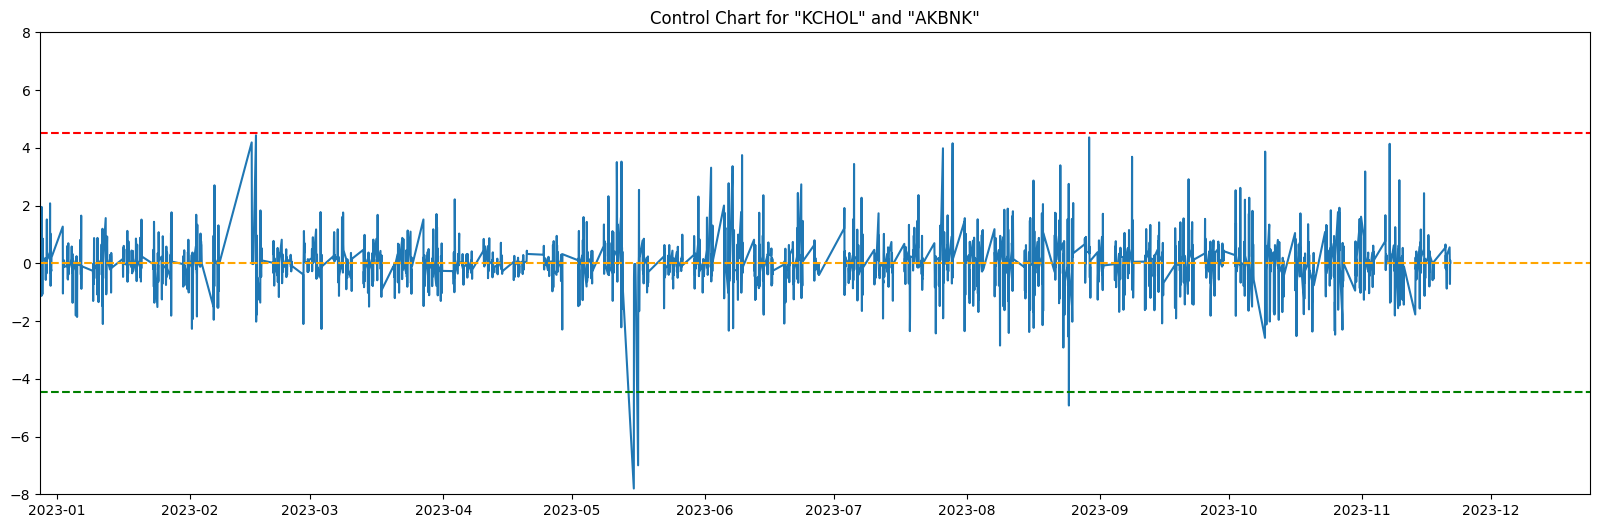

In [335]:
# Ensure residuals.index is a DateTimeIndex
residuals.index = pd.to_datetime(residuals.index)

start_date = dt.datetime.strptime("2022-12-28", "%Y-%m-%d")
end_date = dt.datetime.strptime("2023-12-24", "%Y-%m-%d")

# Calculate control limits
mean_residual = np.mean(residuals)
std_residual = np.std(residuals)
upper_control_limit2 = mean_residual + 3 * std_residual
lower_control_limit2 = mean_residual - 3 * std_residual

# Plot control chart
plt.figure(figsize=(20,6))
plt.plot(residuals)
plt.axhline(mean_residual, color='orange', linestyle='--')
plt.axhline(upper_control_limit2, color='red', linestyle='--')
plt.axhline(lower_control_limit2, color='green', linestyle='--')

plt.title(f'Control Chart for "KCHOL" and "AKBNK"')

plt.ylim(-8,8)
plt.xlim(start_date, end_date)
plt.show()

In [336]:
# Filter the DataFrame for points where residuals exceed the control limits
out_of_control_points = residuals[(residuals > upper_control_limit2) | (residuals < lower_control_limit2)]
out_of_control_points

timestamp
2022-12-26 09:00:00+03:00    57.706845
2023-05-15 09:00:00+03:00    -7.800859
2023-05-16 09:00:00+03:00    -6.996478
2023-08-24 17:00:00+03:00    -4.925833
dtype: float64

In [337]:
# Extract the dates for these points
out_of_control_dates = out_of_control_points.index
out_of_control_dates

DatetimeIndex(['2022-12-26 09:00:00+03:00', '2023-05-15 09:00:00+03:00',
               '2023-05-16 09:00:00+03:00', '2023-08-24 17:00:00+03:00'],
              dtype='datetime64[ns, pytz.FixedOffset(180)]', name='timestamp', freq=None)

In [338]:
for time in out_of_control_dates:
    out_of_controls = diff_df2[diff_df2.index == time]
    print(out_of_controls)


                             KCHOL    AKBNK  KCHOL-AKBNK
timestamp                                               
2022-12-26 09:00:00+03:00  75.8945  18.1629      57.7316
                           KCHOL  AKBNK  KCHOL-AKBNK
timestamp                                           
2023-05-15 09:00:00+03:00   87.2  17.37        69.83
                           KCHOL  AKBNK  KCHOL-AKBNK
timestamp                                           
2023-05-16 09:00:00+03:00   78.5  15.64        62.86
                           KCHOL  AKBNK  KCHOL-AKBNK
timestamp                                           
2023-08-24 17:00:00+03:00  137.2  30.18       107.02


A control chart has been constructed according to the ARIMA model containing 3-sigma limits. The model found 4 out of control signal for “KCHOL” and “AKBANK”. That’s where we will do pairs trading.


In [339]:
diff_df1["residuals"] = diff_df1["GARAN-AKBNK"]
diff_df2["residuals"] = diff_df2["KCHOL-AKBNK"]

<ipython-input-339-939615b25e99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diff_df1["residuals"] = diff_df1["GARAN-AKBNK"]
<ipython-input-339-939615b25e99>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diff_df2["residuals"] = diff_df2["KCHOL-AKBNK"]


ChatGPT prompt of this function is so complicated, we kinda did a fine-tuning for this response.

**Trading Strategy:**
In this trading strategy, when the residuals of the differences fall above or below the control limits outperforming stock is sold and underperforming stock is bought. In other words, let's suppose differences are calculated between stocks A and B as A minus B. If there is an out-of-control signal below LCL, we buy stock A and sell stock B. This is because stock A will be outperforming and stock B will be underperforming since the value “A minus B” will be lower if it falls below LCL. On the other hand, if there is an out-of-control signal above UCL, we buy stock B and sell stock A.

To make a profit using this strategy for “A-B” whenever we get an out-of-control signal below LCL we buy A and sell B, and keep those stocks and do not sell them until we get an out-of-control signal above UCL, as in that case we sell A and buy B and make a profit. There is always an opportunity for profit using this strategy simply because we sell the stocks at a price higher than the price we buy them.


In [340]:
def trade_on_residuals(df, upper_control_limit, lower_control_limit, initial_cash, first_comp="A",second_comp= "B"):

    # Initial holdings are cash only, no stocks
    holdings = {first_comp: 5, second_comp: 5}
    cash = initial_cash
    transactions = []  # To record the transactions

    # Iterate over the DataFrame rows
    for index, row in df.iterrows():
        residual = row['residuals']
        price_A = row[first_comp]
        price_B = row[second_comp]

        # Check if residual exceeds the upper control limit
        if residual > upper_control_limit:
            # Sell A and buy B
            if holdings[first_comp] > 0:
                # Calculate number of shares to sell
                shares_to_sell = holdings[first_comp]
                # Update cash and holdings after selling A
                cash += shares_to_sell * price_A
                holdings[first_comp] -= shares_to_sell
                transactions.append({'action': 'sell', 'stock': first_comp, 'shares': shares_to_sell, 'price': price_A})
                # Use all available cash to buy B
                shares_to_buy = cash // price_B
                cash -= shares_to_buy * price_B
                holdings[second_comp] += shares_to_buy
                transactions.append({'action': 'buy', 'stock': second_comp, 'shares': shares_to_buy, 'price': price_B})

        # Check if residual exceeds the lower control limit
        elif residual < lower_control_limit:
            # Sell B and buy A
            if holdings[second_comp] > 0:
                # Calculate number of shares to sell
                shares_to_sell = holdings[second_comp]
                # Update cash and holdings after selling B
                cash += shares_to_sell * price_B
                holdings[second_comp] -= shares_to_sell
                transactions.append({'action': 'sell', 'stock': second_comp, 'shares': shares_to_sell, 'price': price_B})
                # Use all available cash to buy A
                shares_to_buy = cash // price_A
                cash -= shares_to_buy * price_A
                holdings[first_comp] += shares_to_buy
                transactions.append({'action': 'buy', 'stock': first_comp, 'shares': shares_to_buy, 'price': price_A})

    transactions_df = pd.DataFrame(transactions)

    # Get the last price of stock A and B
    last_price_A = df.iloc[-1][first_comp]
    last_price_B = df.iloc[-1][second_comp]

    # Calculate the value of the holdings at the last available prices
    value_of_A = holdings[first_comp] * last_price_A
    value_of_B = holdings[second_comp] * last_price_B
    net_final_value = cash + value_of_A + value_of_B

    # Return the net final value along with the other information
    return holdings, cash, transactions_df, net_final_value



### Examples for pair-trading

In [341]:
# Examples
initial_cash = 10000  # Initial cash amount

holdings, remaining_cash, transactions, net_final_value = trade_on_residuals(
    diff_df2,
    upper_control_limit2,
    lower_control_limit2,
    initial_cash,
    "KCHOL",
    "AKBNK"
)

print(f"Final Holdings: {holdings}")
print(f"Remaining Cash: {remaining_cash}")
print(f"Net Final Value: {net_final_value}")
transactions


Final Holdings: {'KCHOL': 0, 'AKBNK': 576.0}
Remaining Cash: 8.456599999999526
Net Final Value: 17553.416599999997


action  stock  shares    price
0   sell  KCHOL     5.0  75.8945
1    buy  AKBNK   571.0  18.1629

In [342]:
# Examples
initial_cash2 = 20000  # Initial cash amount

holdings2, remaining_cash2, transactions2, net_final_value2 = trade_on_residuals(
    diff_df1,
    upper_control_limit1,
    lower_control_limit1,
    initial_cash,
    "GARAN",
    "AKBNK"
)

print(f"Final Holdings: {holdings2}")
print(f"Remaining Cash: {remaining_cash2}")
print(f"Net Final Value: {net_final_value2}")
transactions2


Final Holdings: {'GARAN': 0, 'AKBNK': 563.0}
Remaining Cash: 5.112800000000789
Net Final Value: 17154.0928


action  stock  shares    price
0   sell  GARAN     5.0  28.0022
1    buy  AKBNK   558.0  18.1629

In [343]:
# Examples
initial_cash3 = 50000  # Initial cash amount

holdings3, remaining_cash3, transactions3, net_final_value3 = trade_on_residuals(
    diff_df1,
    upper_control_limit1,
    lower_control_limit1,
    initial_cash,
    "GARAN",
    "AKBNK"
)

print(f"Final Holdings: {holdings3}")
print(f"Remaining Cash: {remaining_cash3}")
print(f"Net Final Value: {net_final_value3}")
transactions3


Final Holdings: {'GARAN': 0, 'AKBNK': 563.0}
Remaining Cash: 5.112800000000789
Net Final Value: 17154.0928


action  stock  shares    price
0   sell  GARAN     5.0  28.0022
1    buy  AKBNK   558.0  18.1629

In [344]:
# Examples
initial_cash4 = 50000  # Initial cash amount

holdings4, remaining_cash4, transactions4, net_final_value4 = trade_on_residuals(
    diff_df2,
    upper_control_limit2,
    lower_control_limit2,
    initial_cash,
    "KCHOL",
    "AKBNK"
)

print(f"Final Holdings: {holdings4}")
print(f"Remaining Cash: {remaining_cash4}")
print(f"Net Final Value: {net_final_value4}")
transactions4

Final Holdings: {'KCHOL': 0, 'AKBNK': 576.0}
Remaining Cash: 8.456599999999526
Net Final Value: 17553.416599999997


action  stock  shares    price
0   sell  KCHOL     5.0  75.8945
1    buy  AKBNK   571.0  18.1629

In [345]:
# Examples
initial_cash5 = 4000  # Initial cash amount

holdings5, remaining_cash5, transactions5, net_final_value5 = trade_on_residuals(
    diff_df1,
    upper_control_limit1,
    lower_control_limit1,
    initial_cash,
    "GARAN",
    "AKBNK"
)

print(f"Final Holdings: {holdings5}")
print(f"Remaining Cash: {remaining_cash5}")
print(f"Net Final Value: {net_final_value5}")
transactions5


Final Holdings: {'GARAN': 0, 'AKBNK': 563.0}
Remaining Cash: 5.112800000000789
Net Final Value: 17154.0928


action  stock  shares    price
0   sell  GARAN     5.0  28.0022
1    buy  AKBNK   558.0  18.1629

In [346]:
# Examples
initial_cash6 = 4000  # Initial cash amount

holdings6, remaining_cash6, transactions6, net_final_value6 = trade_on_residuals(
    diff_df2,
    upper_control_limit2,
    lower_control_limit2,
    initial_cash,
    "KCHOL",
    "AKBNK"
)

print(f"Final Holdings: {holdings6}")
print(f"Remaining Cash: {remaining_cash6}")
print(f"Net Final Value: {net_final_value6}")
transactions6

Final Holdings: {'KCHOL': 0, 'AKBNK': 576.0}
Remaining Cash: 8.456599999999526
Net Final Value: 17553.416599999997


action  stock  shares    price
0   sell  KCHOL     5.0  75.8945
1    buy  AKBNK   571.0  18.1629

## Conclusion

In conclusion, by using ARIMA model, we observed that out of control charts can give insights about when to buy and sell two highly correlated stocks. Since the linear regression is a simple model, it fails to capture the deviation from the expected relationship between stocks. By implementing out of control charts to pairs trading, we can make profit by utilizing the relationship between highly correlated stocks.